In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
census_dataset=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
census_dataset

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [6]:
census_dataset.shape

(32560, 15)

In [7]:
census_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
census_dataset.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
census_dataset.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [10]:
census_dataset=census_dataset.replace(' ?', np.NaN)

In [11]:
census_dataset.isin([' ','NA','-']).sum().any()

False

In [12]:
census_dataset.drop_duplicates(keep='last', inplace=True)

<AxesSubplot:>

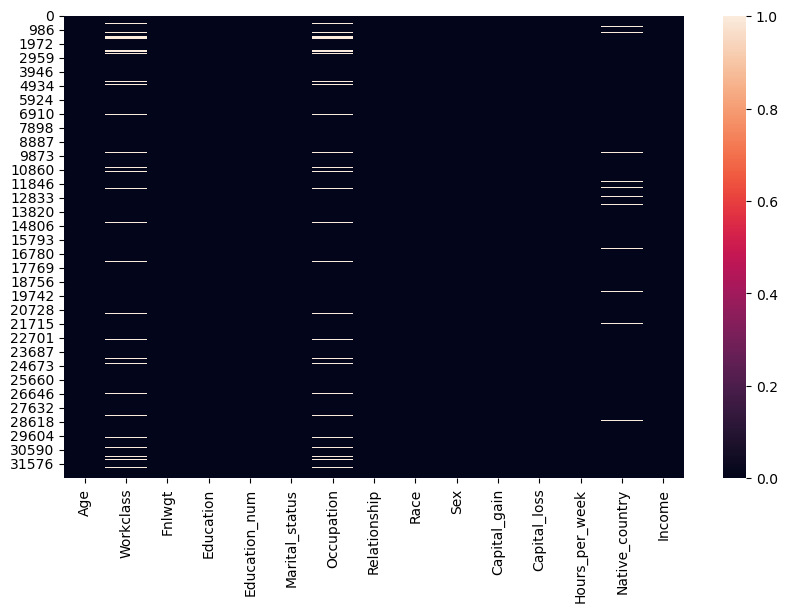

In [13]:
#Missing value check
plt.figure(figsize=(10,6))
sns.heatmap(census_dataset.isnull())

In [14]:
#Finding what percentage of data is missing from the dataset
missing_values = census_dataset.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(census_dataset))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


In [15]:
# Separating numerical and categorical variable
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [16]:
# Imputating Missing value with mode for categorical features
census_dataset['Occupation'].fillna(census_dataset['Occupation'].mode()[0],inplace=True)
census_dataset['Workclass'].fillna(census_dataset['Workclass'].mode()[0],inplace=True)
census_dataset['Native_country'].fillna(census_dataset['Native_country'].mode()[0],inplace=True)

In [17]:
#Missing Value Check After Imputataion
missing_values = census_dataset.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(census_dataset))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


<AxesSubplot:>

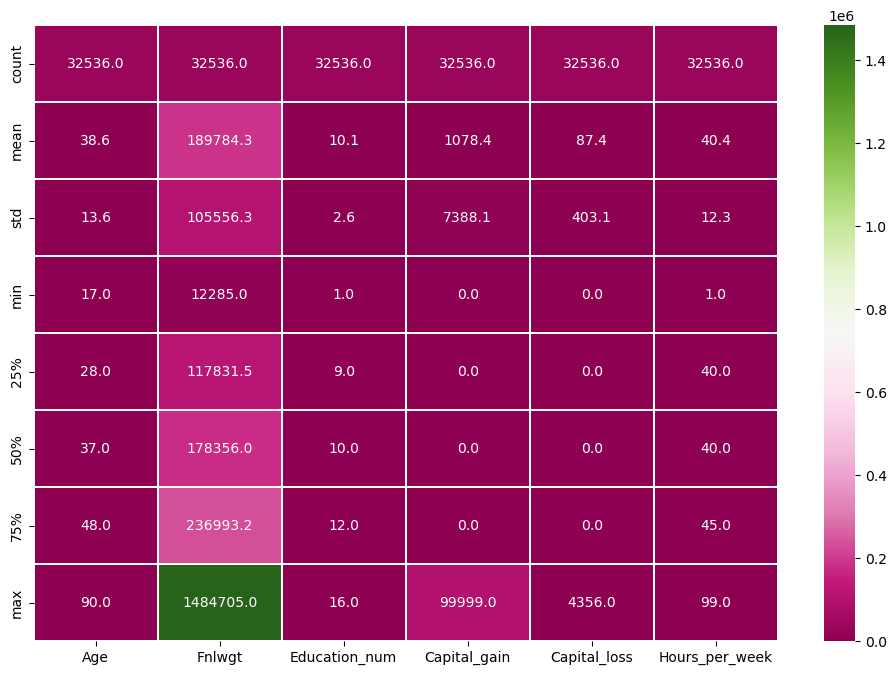

In [18]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(census_dataset.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [19]:
census_dataset.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [20]:
#Exploring categorial features with Enlisting Value counts & Sub-categories
for i in Category:
    print(i)
    print(census_dataset[i].value_counts())
    print('='*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5979
 Craft-repair         40

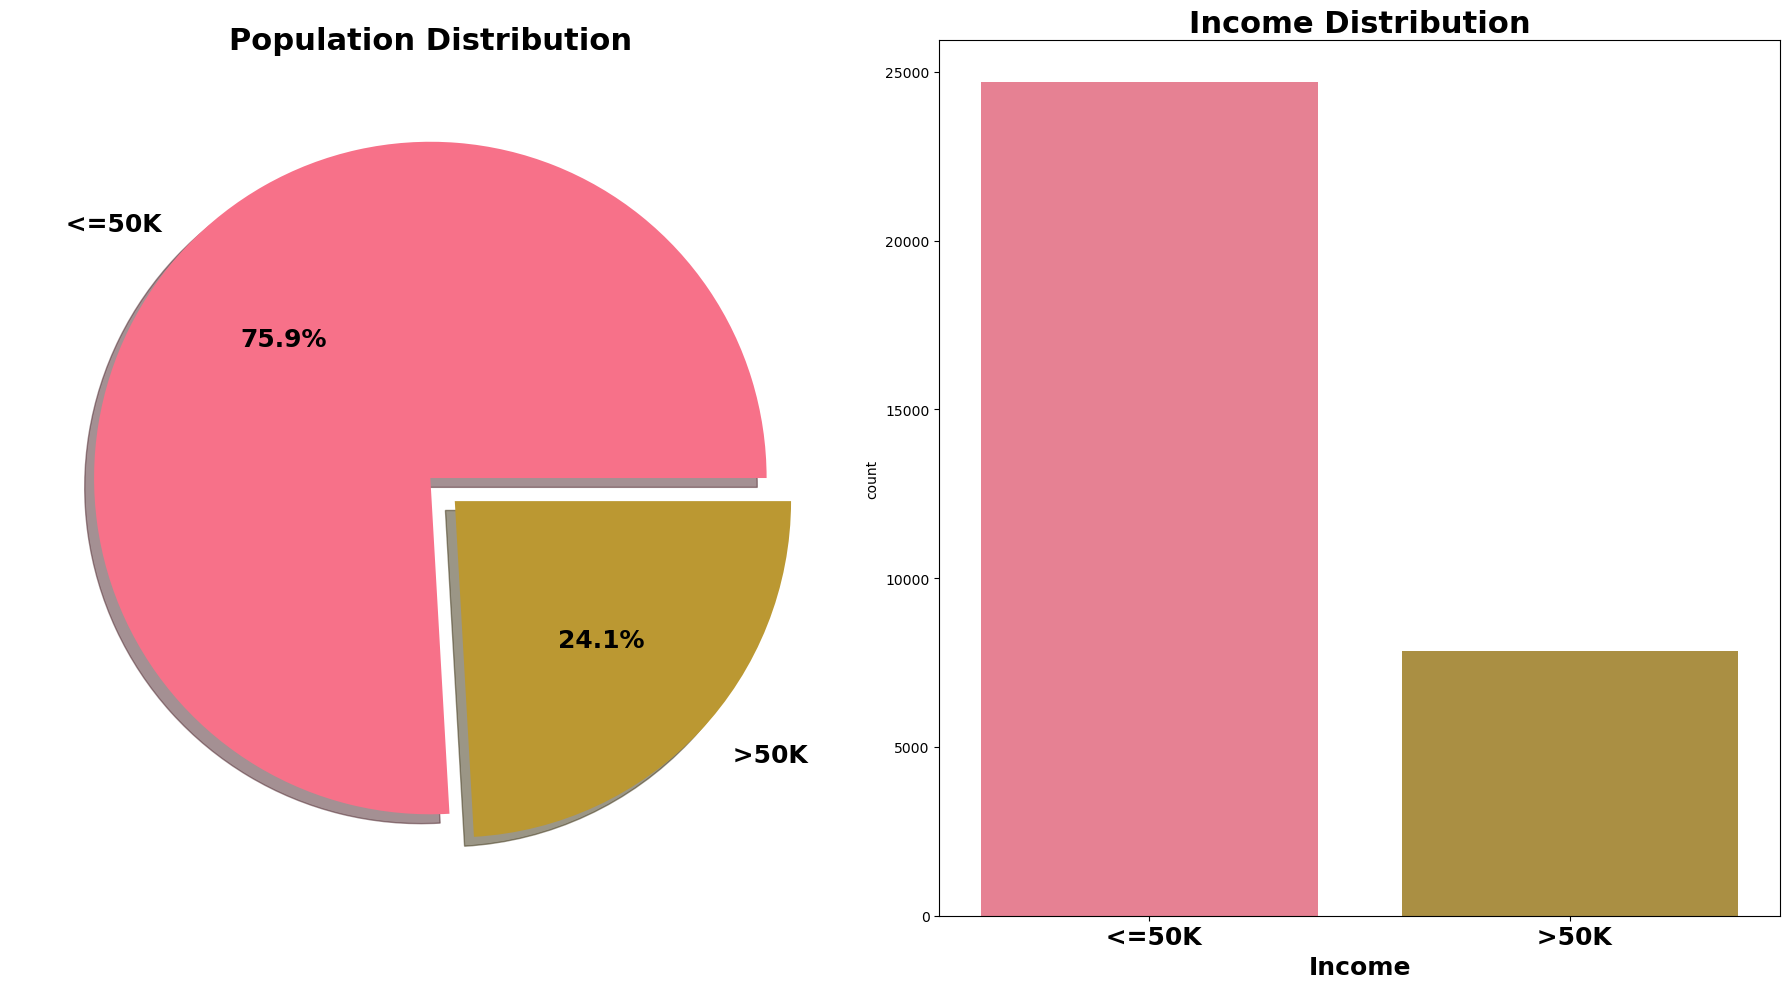

In [21]:
#EDA by analysing our target variable first.
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,10))
census_dataset['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Income',data=census_dataset,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()


In [22]:
#Exploration of Age
print('Minimum Age:', census_dataset['Age'].min(),'years')
print('Maximum Age:', census_dataset['Age'].max(),'years')
print('Average Age:', census_dataset['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


In [23]:
# Defining function to create new columns to classify people according different age gruop
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'


In [24]:
# Calling function age_group
census_dataset['age_group']=census_dataset['Age'].apply(age_group)

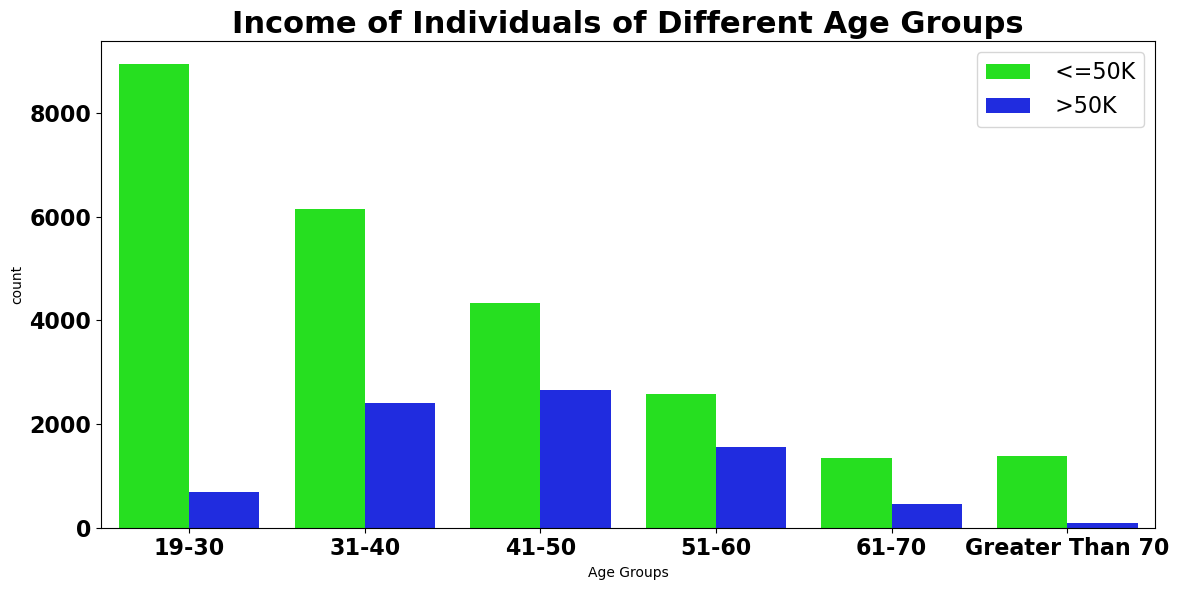

In [25]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
p = sns.countplot(census_dataset['age_group'], hue=census_dataset['Income'], palette='hsv', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=22, fontweight='bold')
p.set_xlabel('Age Groups')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

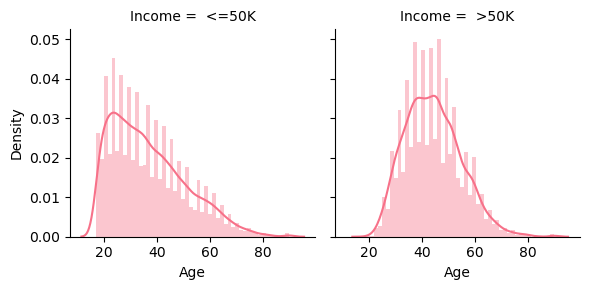

In [26]:
# Distribution of age with income categories
ax= sns.FacetGrid(census_dataset,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

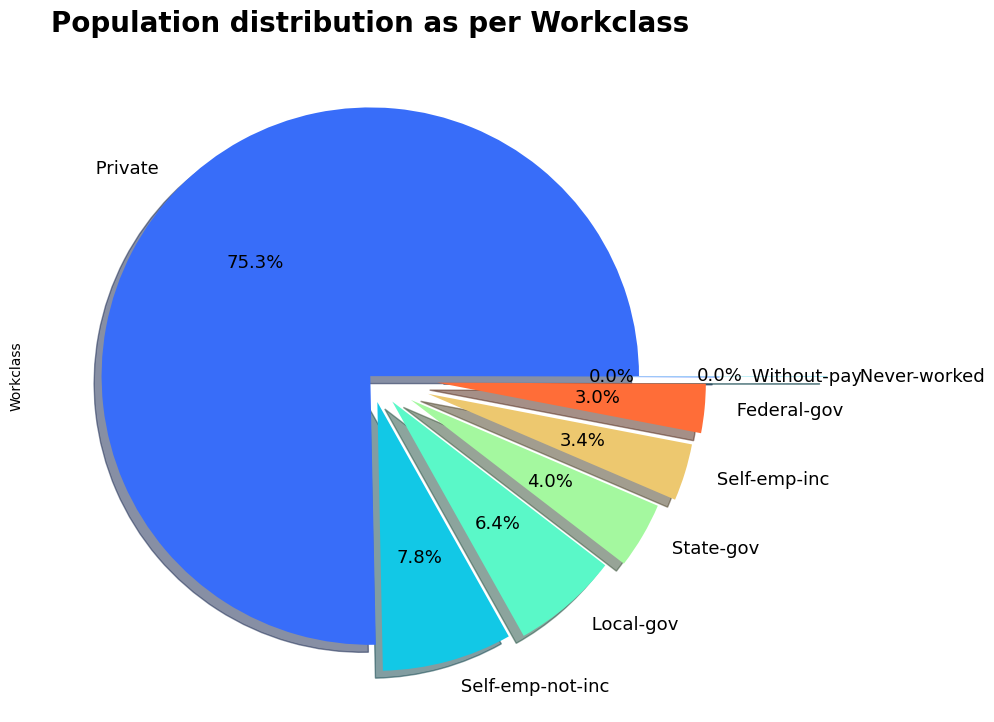

In [27]:
#let dive into workclass and see what insight we get from there.
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
census_dataset['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Workclass', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()


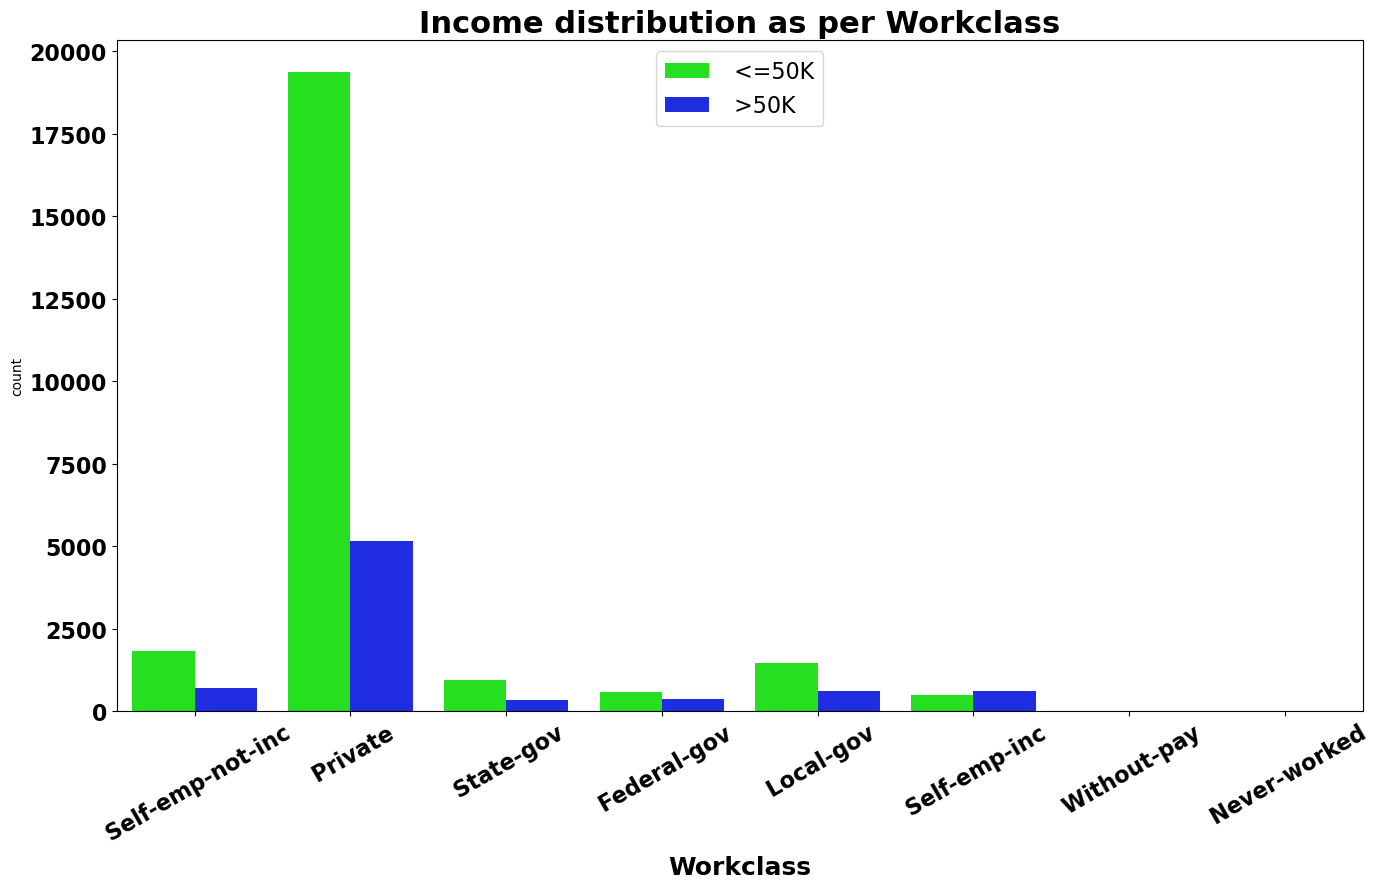

In [28]:
plt.figure(figsize=(14,9))
p = sns.countplot(census_dataset['Workclass'], hue=census_dataset['Income'], palette='hsv')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()


In [29]:
pd.crosstab(census_dataset['Income'],census_dataset["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

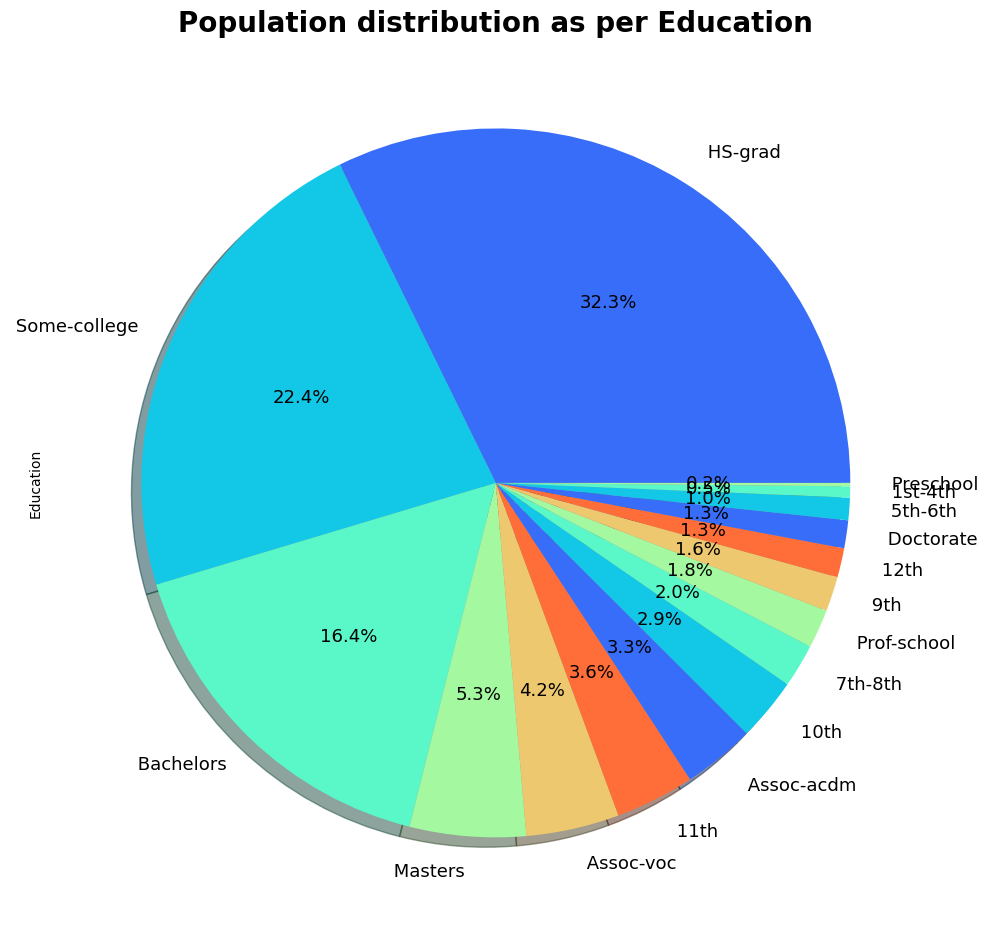

In [30]:
#Education Vs Income
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
census_dataset['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Education', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

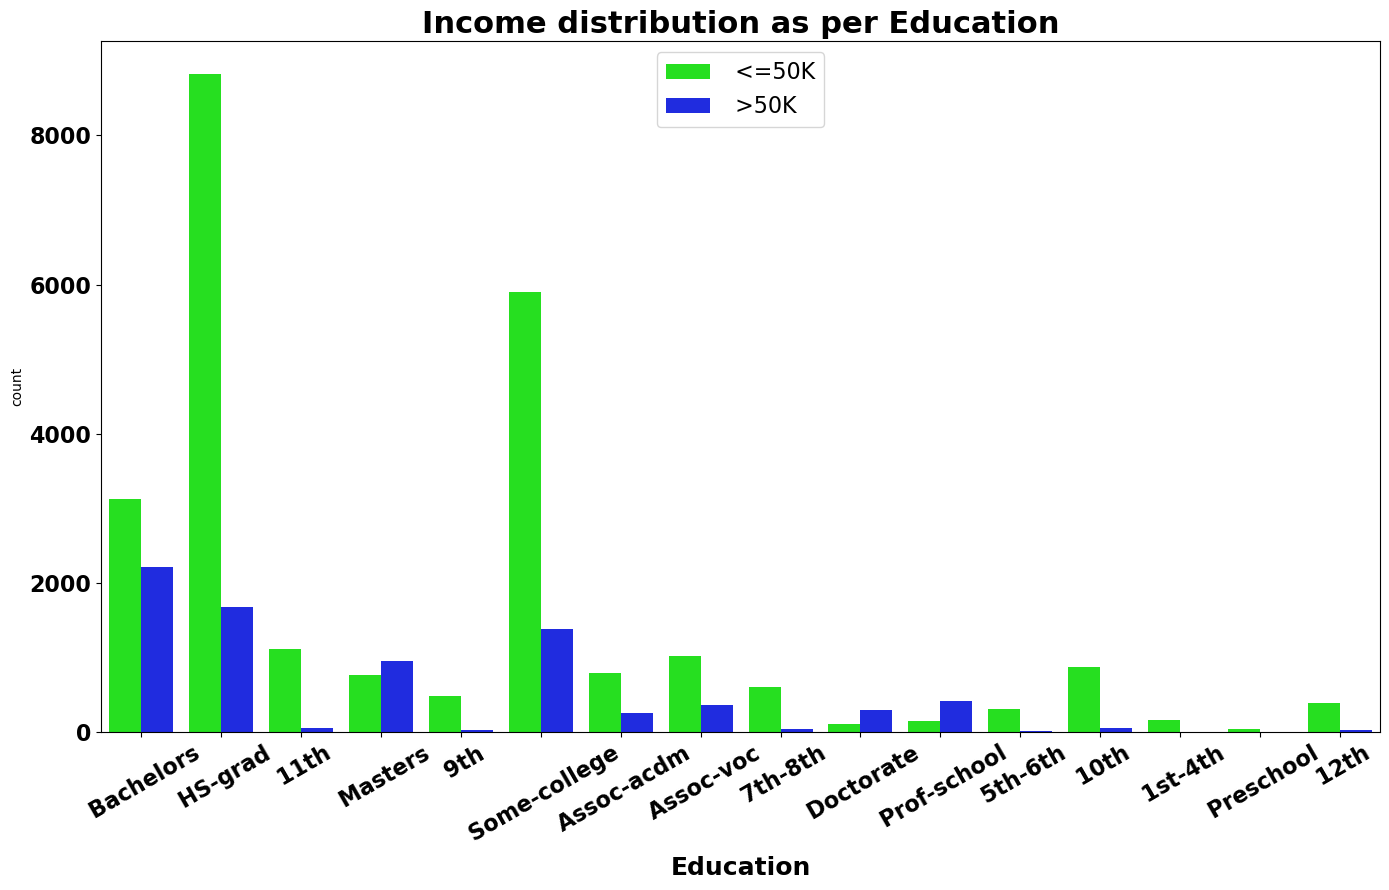

In [31]:
plt.figure(figsize=(14,9))
p = sns.countplot(census_dataset['Education'], hue=census_dataset['Income'], palette='hsv')
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()


In [32]:
pd.crosstab(census_dataset['Education'],census_dataset["Workclass"], margins=True).style.background_gradient(cmap='summer_r')


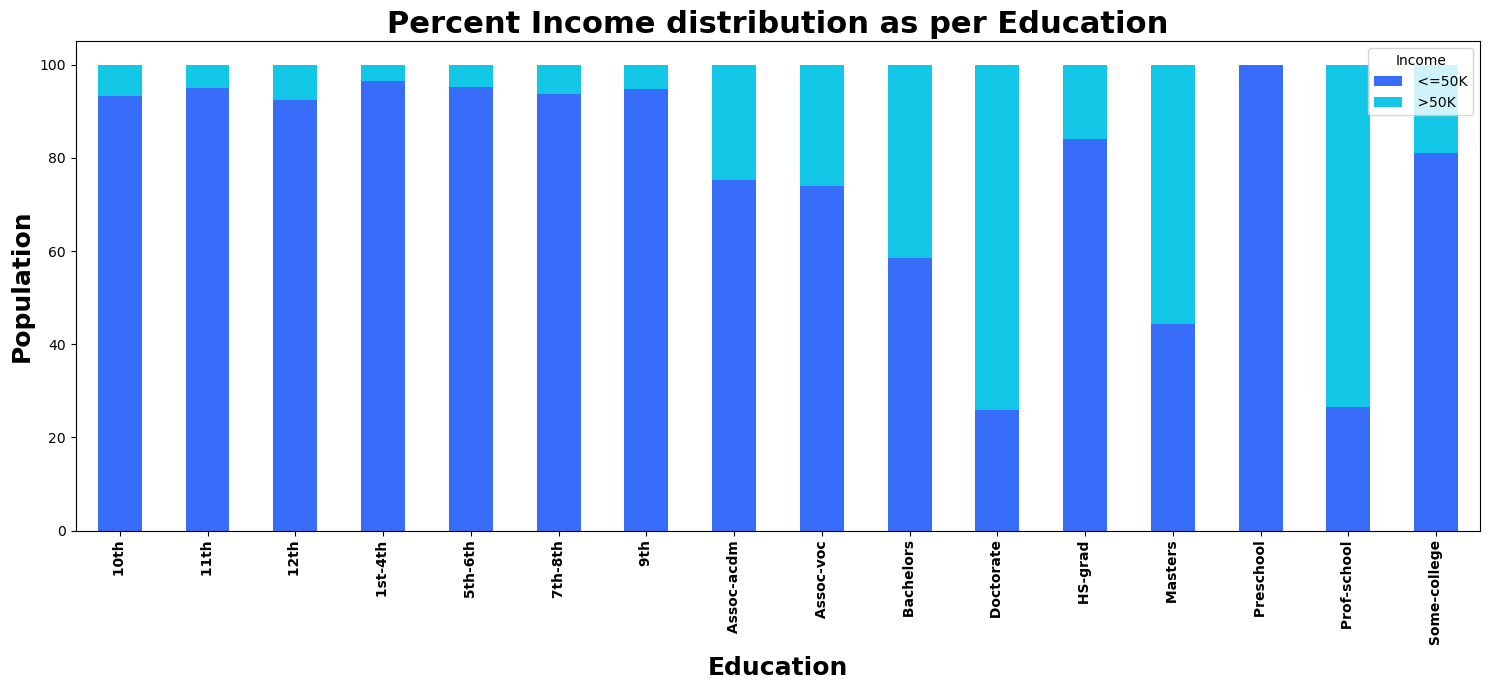

In [33]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(census_dataset['Education'], census_dataset['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()


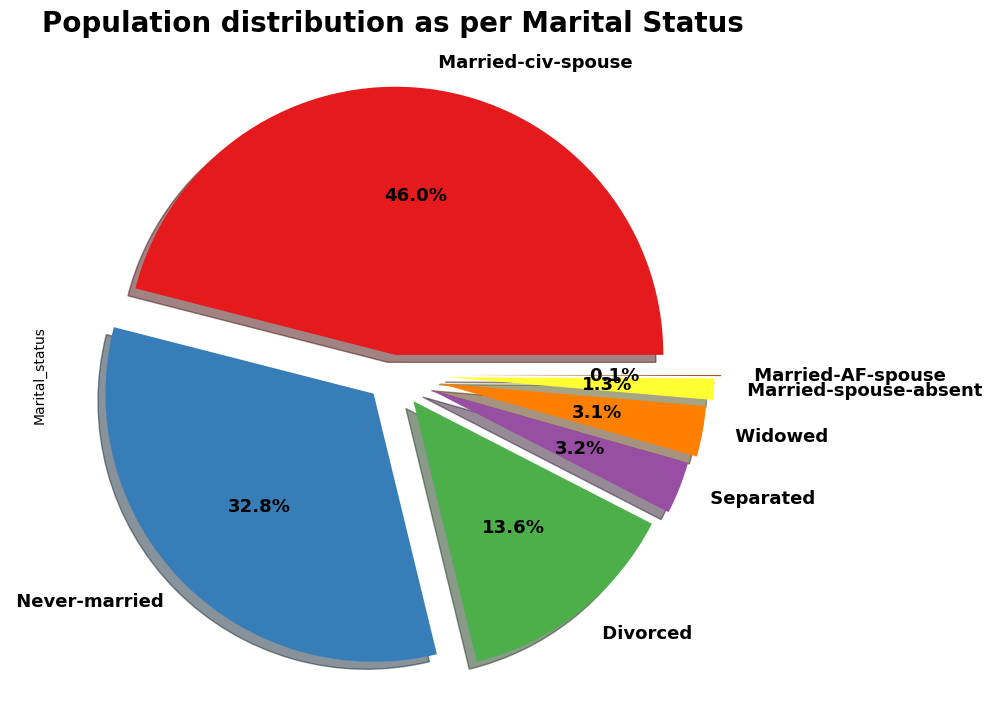

In [34]:
#Impact of Marital Status on Income
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize=(10,10))
census_dataset['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],
                                             textprops ={'fontsize':13,'fontweight':'bold'},shadow=True)
plt.title('Population distribution as per Marital Status', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()


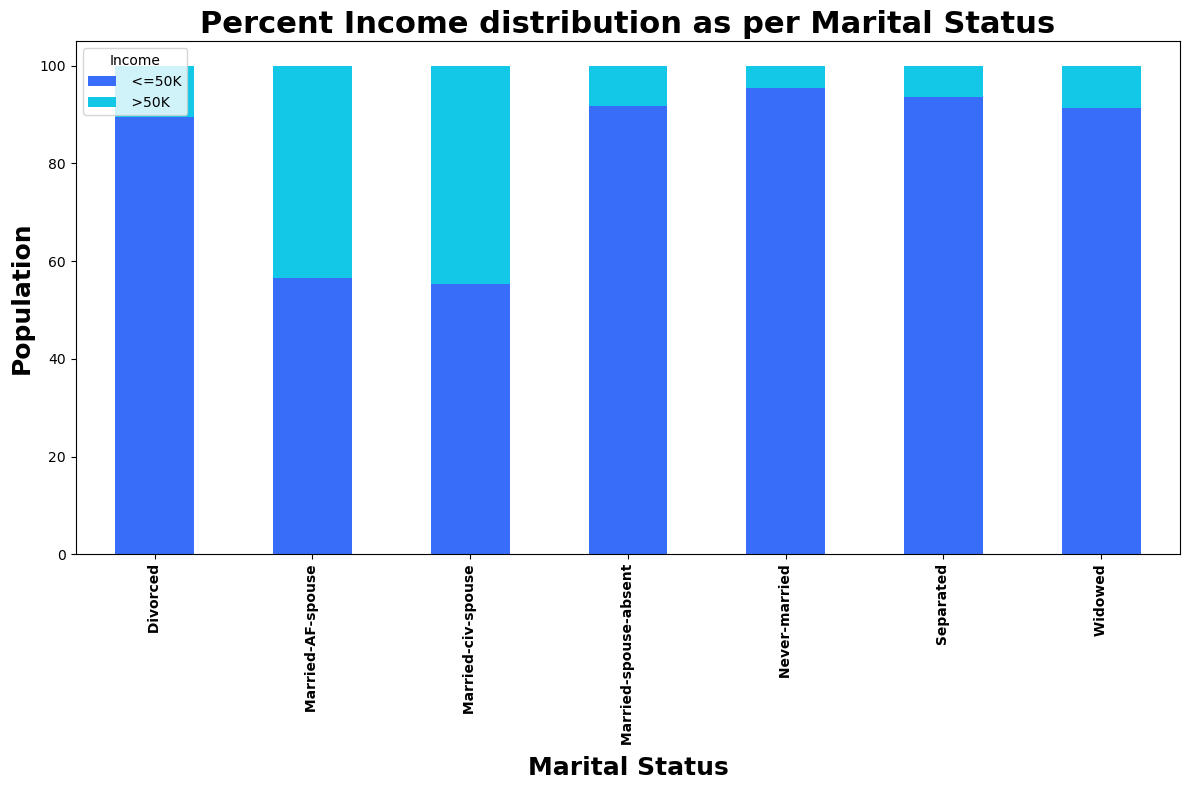

In [35]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(census_dataset['Marital_status'], census_dataset['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Marital Status', fontsize=22, fontweight='bold')
plt.xlabel('Marital Status', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()


In [36]:
pd.crosstab(census_dataset['Marital_status'],census_dataset["Income"], margins=True).style.background_gradient(cmap='summer_r')


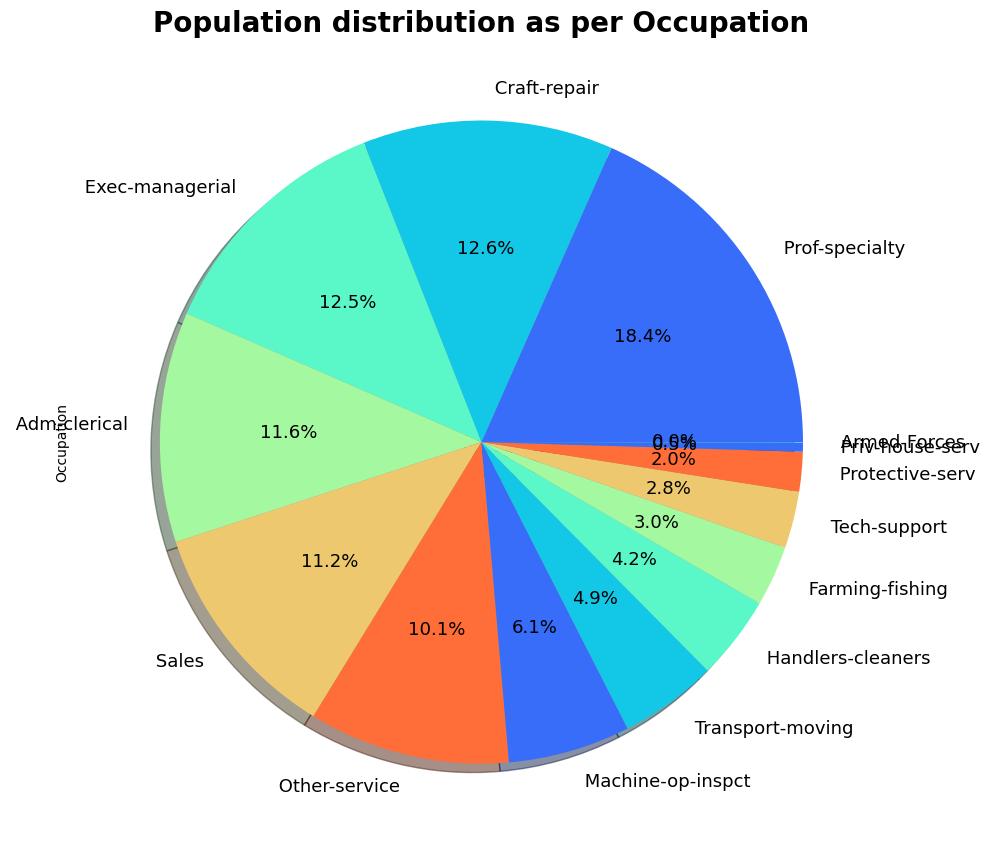

In [37]:
#Occupation VS Income
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
census_dataset['Occupation'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Occupation', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()


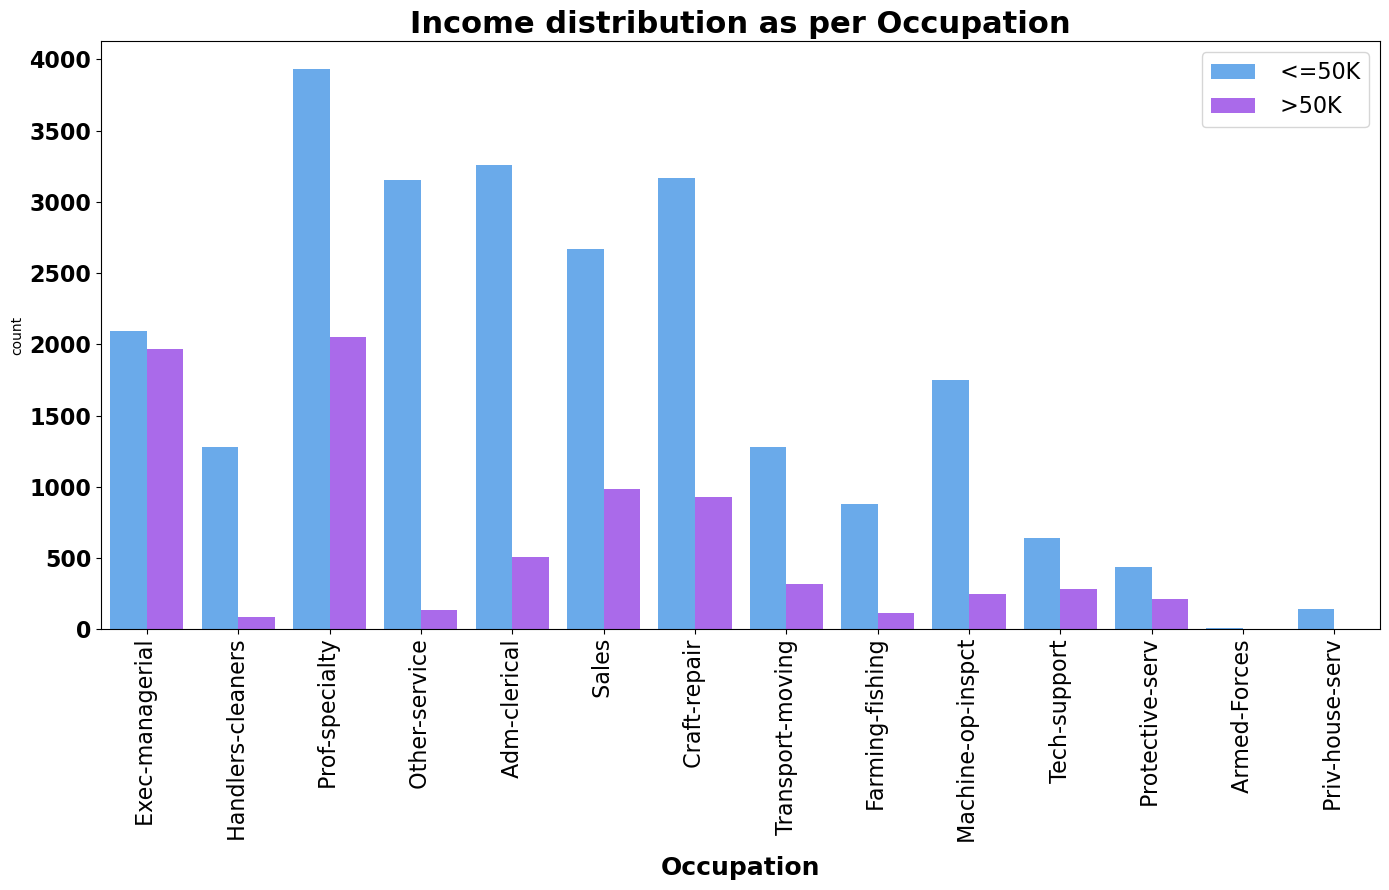

In [38]:
plt.figure(figsize=(14,9))
p = sns.countplot(census_dataset['Occupation'], hue=census_dataset['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Occupation',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()


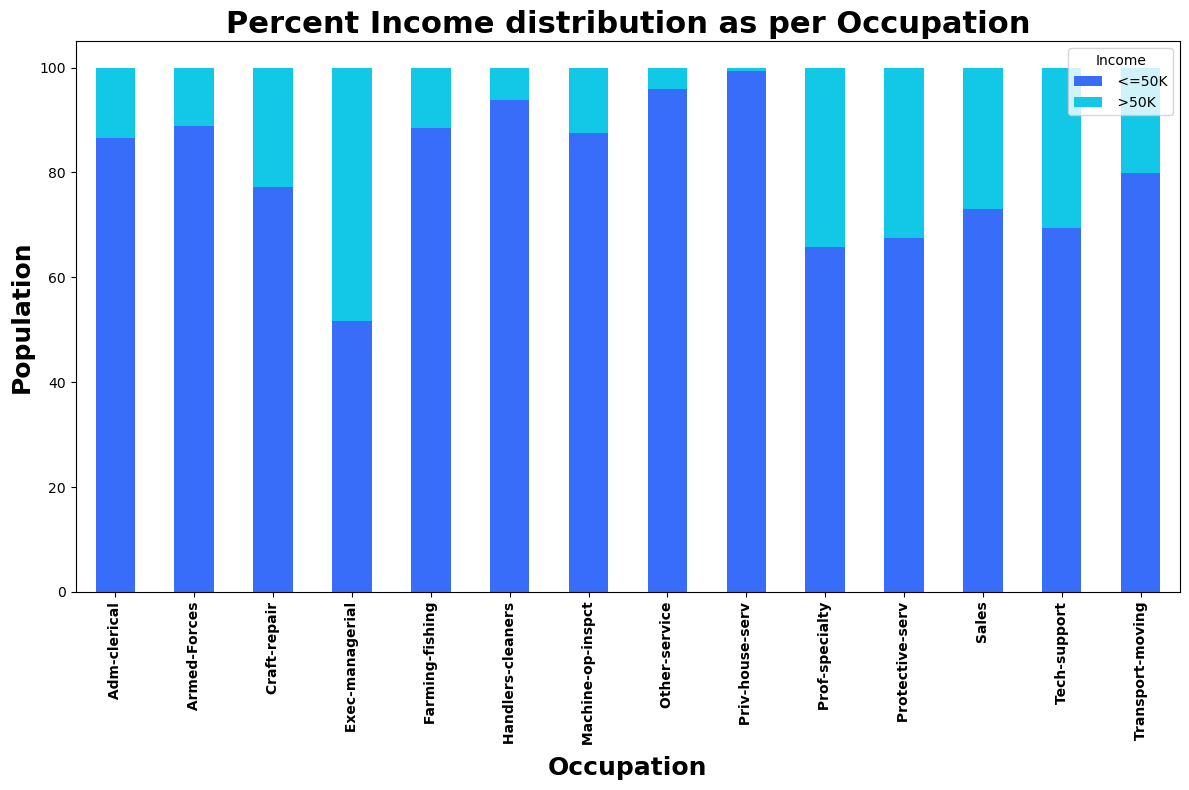

In [39]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(census_dataset['Occupation'], census_dataset['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()


In [40]:
pd.crosstab(census_dataset['Occupation'],census_dataset["Income"], margins=True).style.background_gradient(cmap='winter_r')


In [41]:
pd.crosstab(census_dataset['Occupation'],census_dataset["Workclass"], margins=True).style.background_gradient(cmap='winter_r')


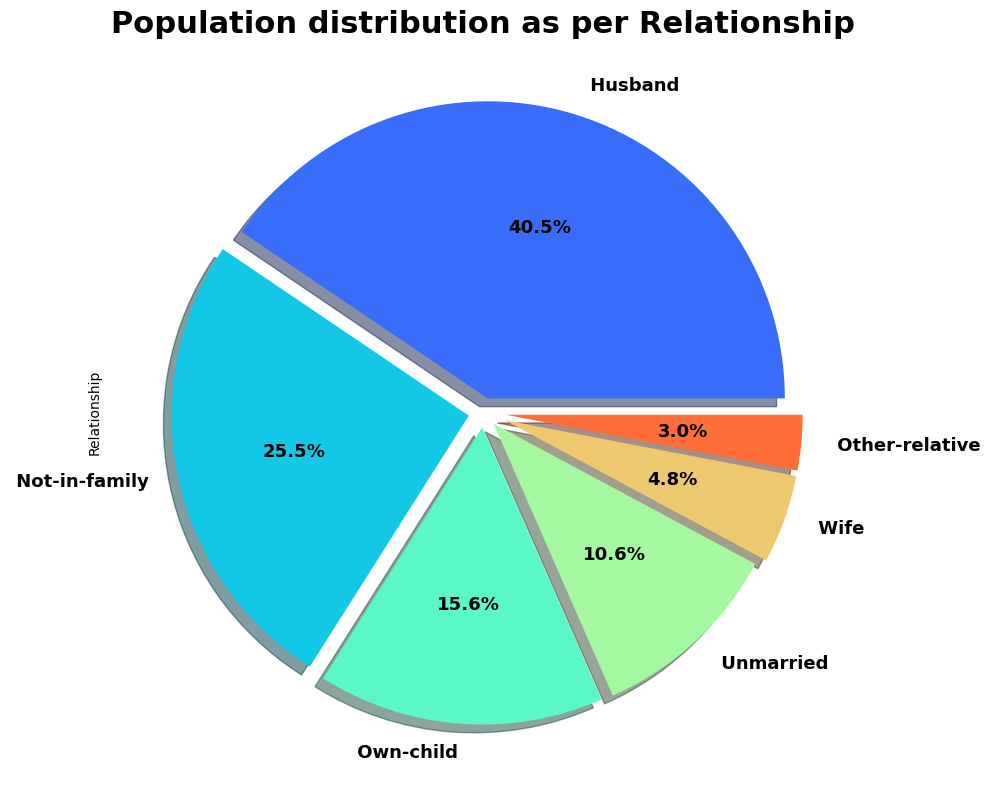

In [42]:
#Relationship VS Income
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
census_dataset['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()


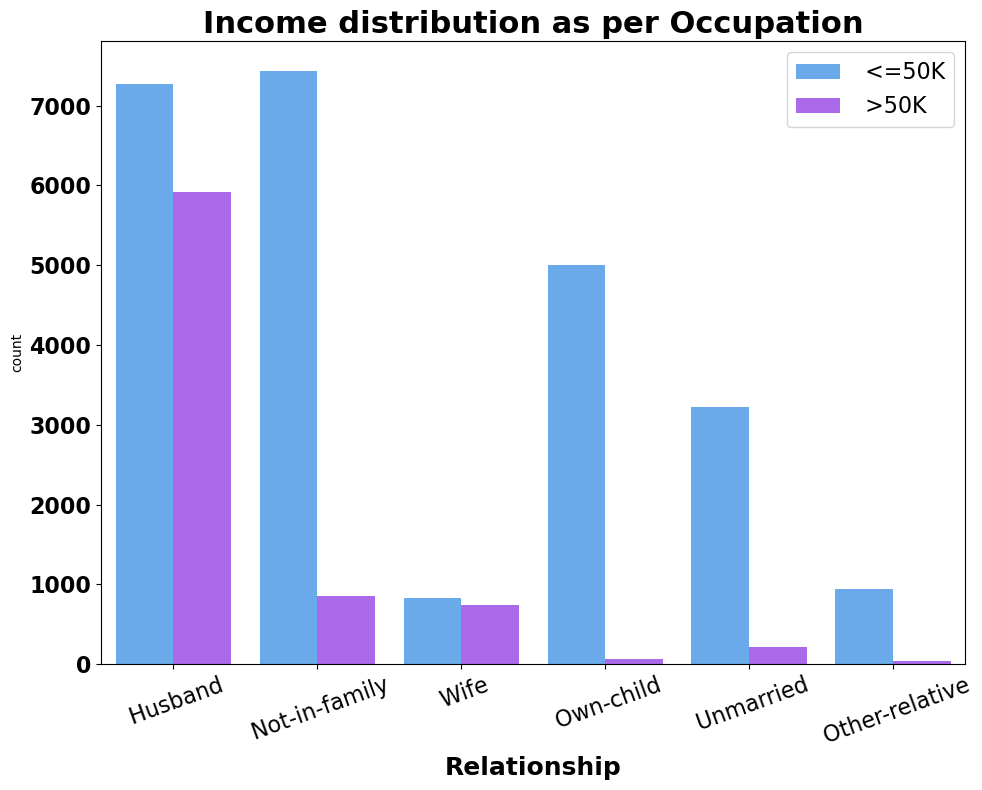

In [44]:
plt.figure(figsize=(10,8))
p = sns.countplot(census_dataset['Relationship'], hue=census_dataset['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()


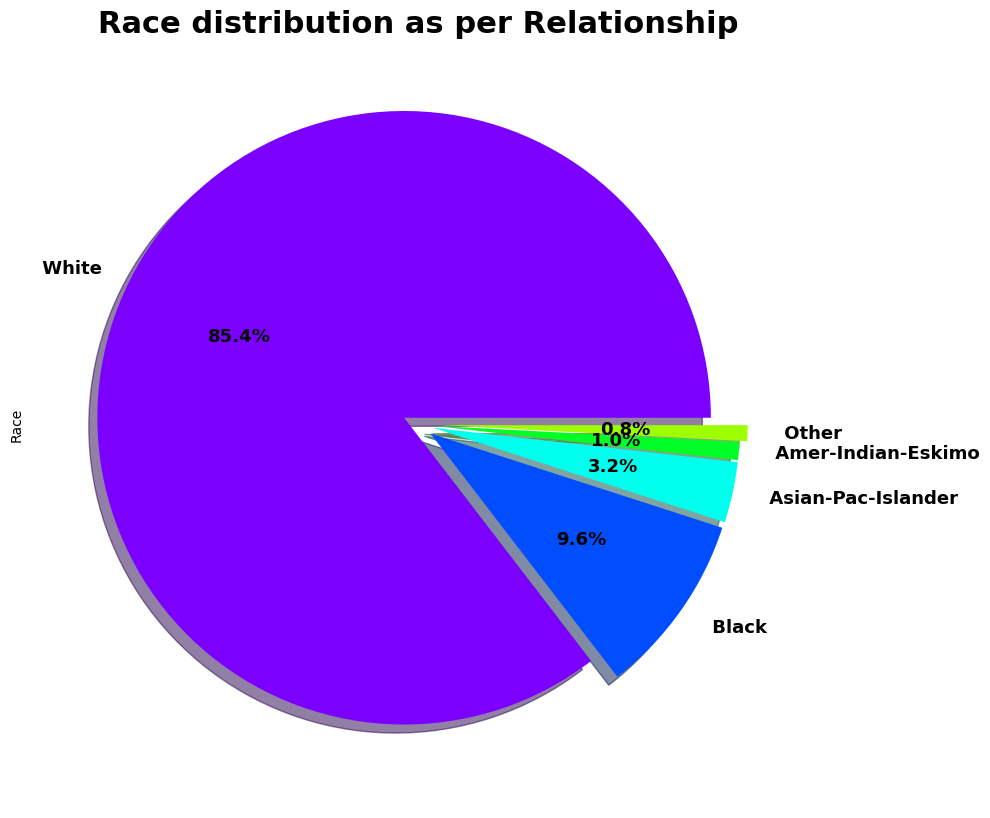

In [45]:
#Race vs Income
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(10,10))
census_dataset['Race'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Race distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()


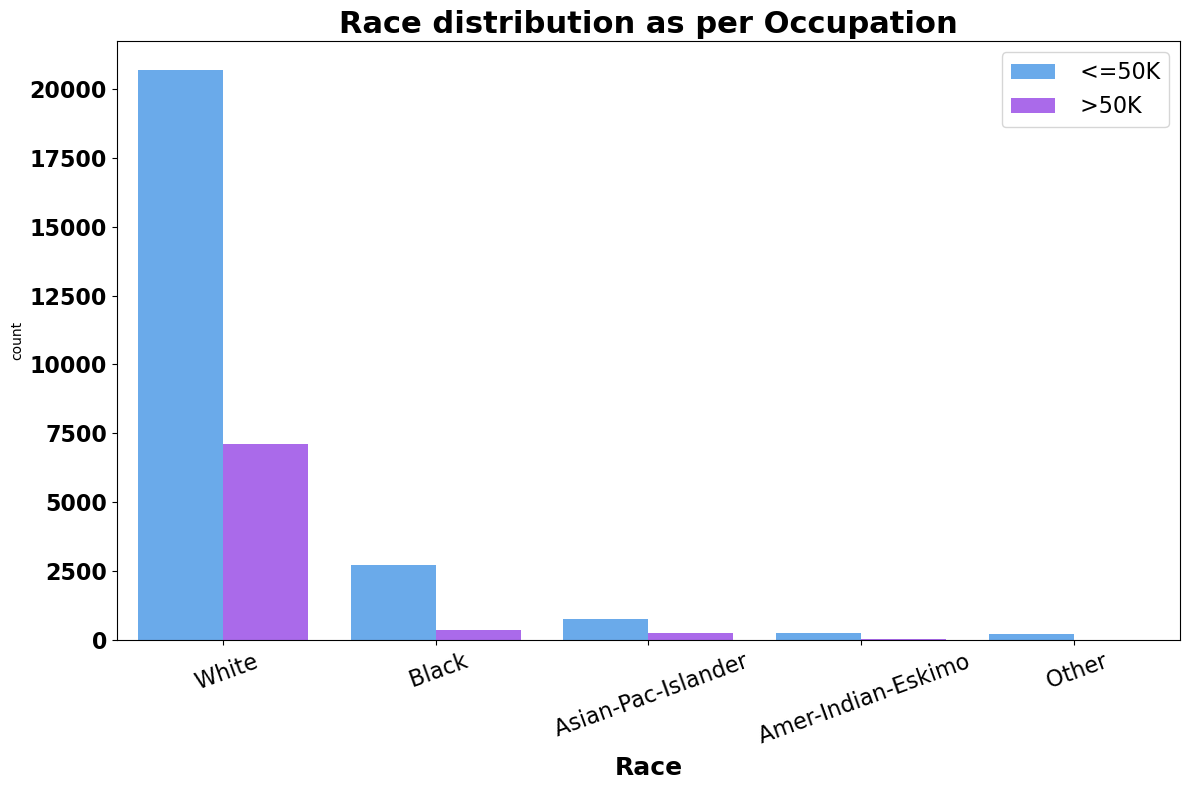

In [46]:
plt.figure(figsize=(12,8))
p = sns.countplot(census_dataset['Race'], hue=census_dataset['Income'], palette='cool')
plt.title('Race distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Race',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()


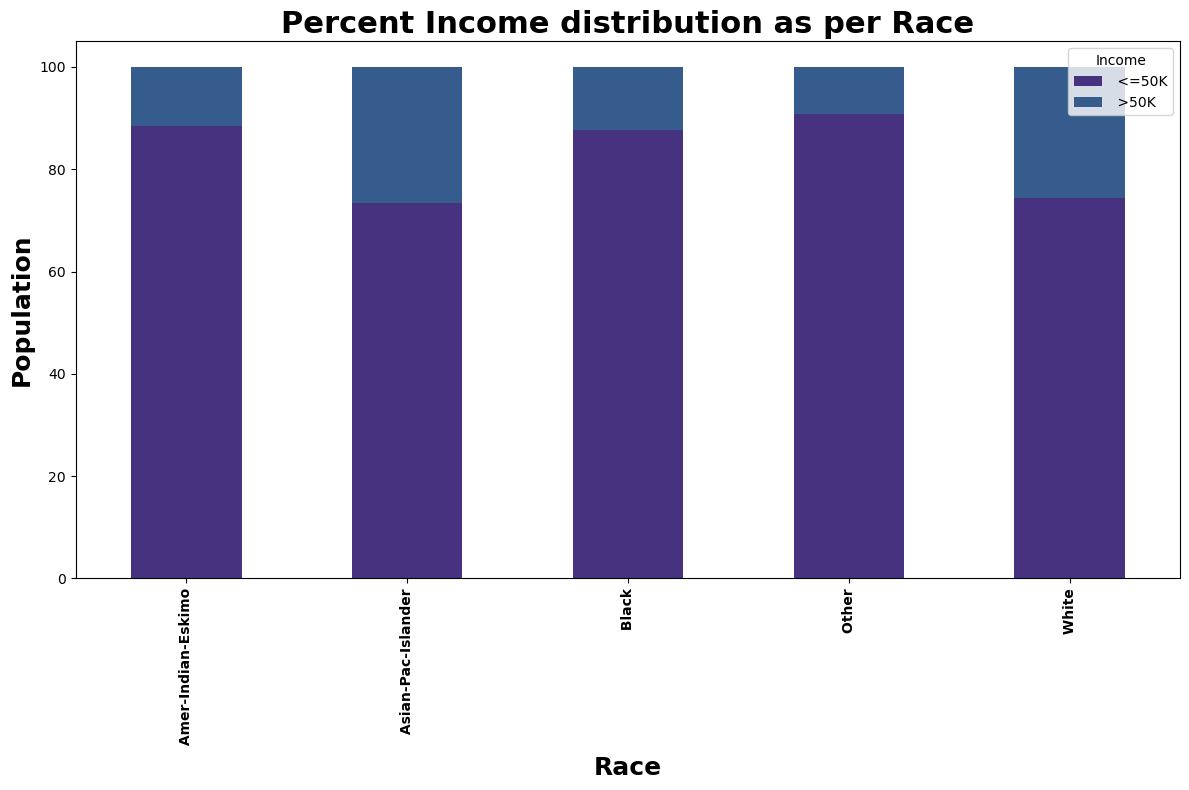

In [47]:
# Percentage Income distribution in terms of Education
sns.set_palette('viridis')
table = pd.crosstab(census_dataset['Race'], census_dataset['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Race', fontsize=22, fontweight='bold')
plt.xlabel('Race', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()


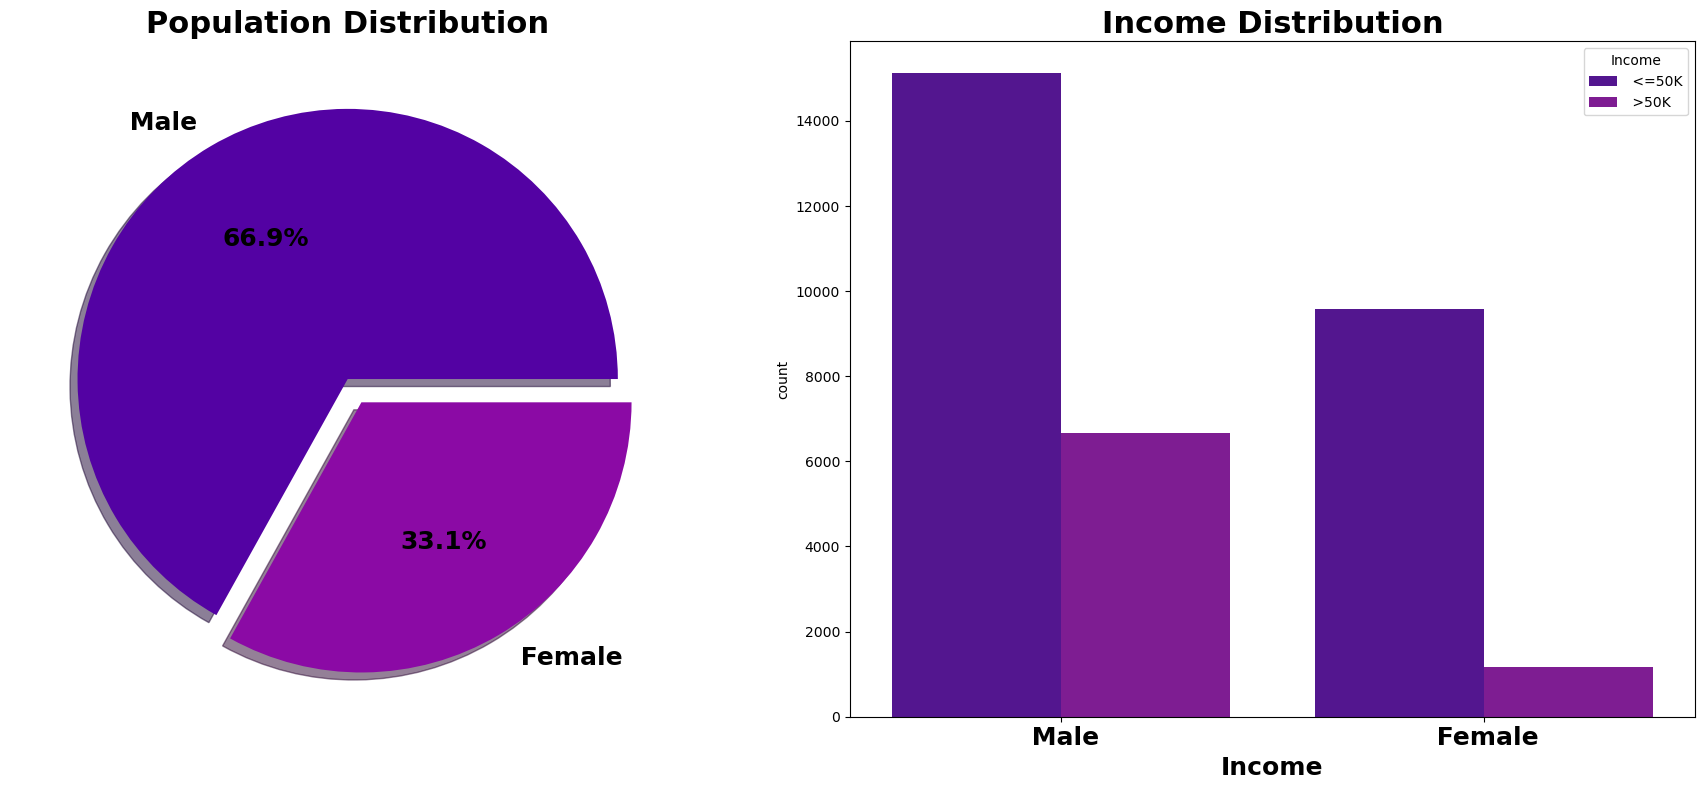

In [49]:
#Sex Vs Income
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(18,8))
census_dataset['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Sex',hue=census_dataset['Income'] ,data=census_dataset,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()


In [50]:
pd.crosstab(census_dataset['Occupation'],[census_dataset.Sex,census_dataset.Income], margins=True).style.background_gradient(cmap='winter_r')


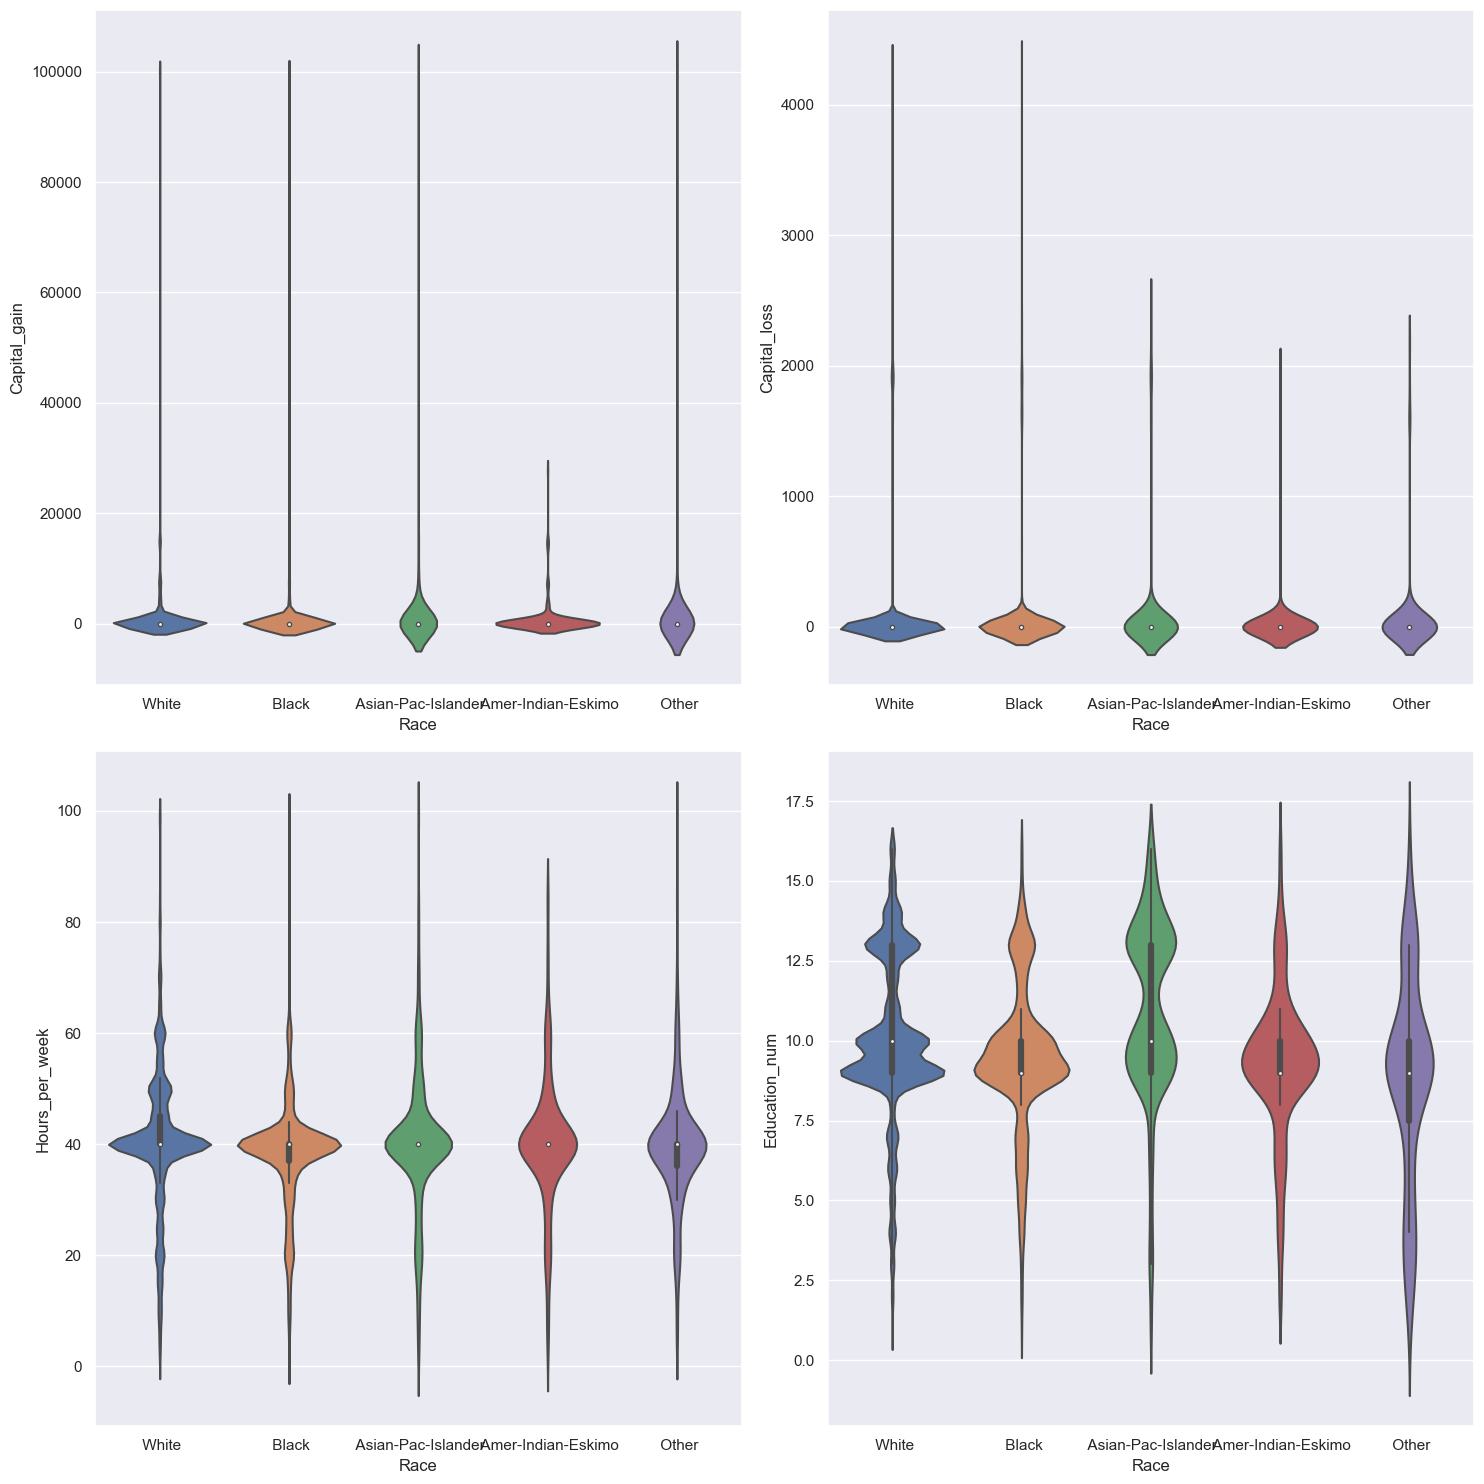

In [51]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = census_dataset['Race'], y = census_dataset['Capital_gain'], data = census_dataset);
plt.subplot(2,2,2)
sns.violinplot(x = census_dataset['Race'], y = census_dataset['Capital_loss'], data = census_dataset);
plt.subplot(2,2,3)
sns.violinplot(x = census_dataset['Race'], y = census_dataset['Hours_per_week'], data = census_dataset);
plt.subplot(2,2,4)
sns.violinplot(x = census_dataset['Race'], y = census_dataset['Education_num'], data = census_dataset);


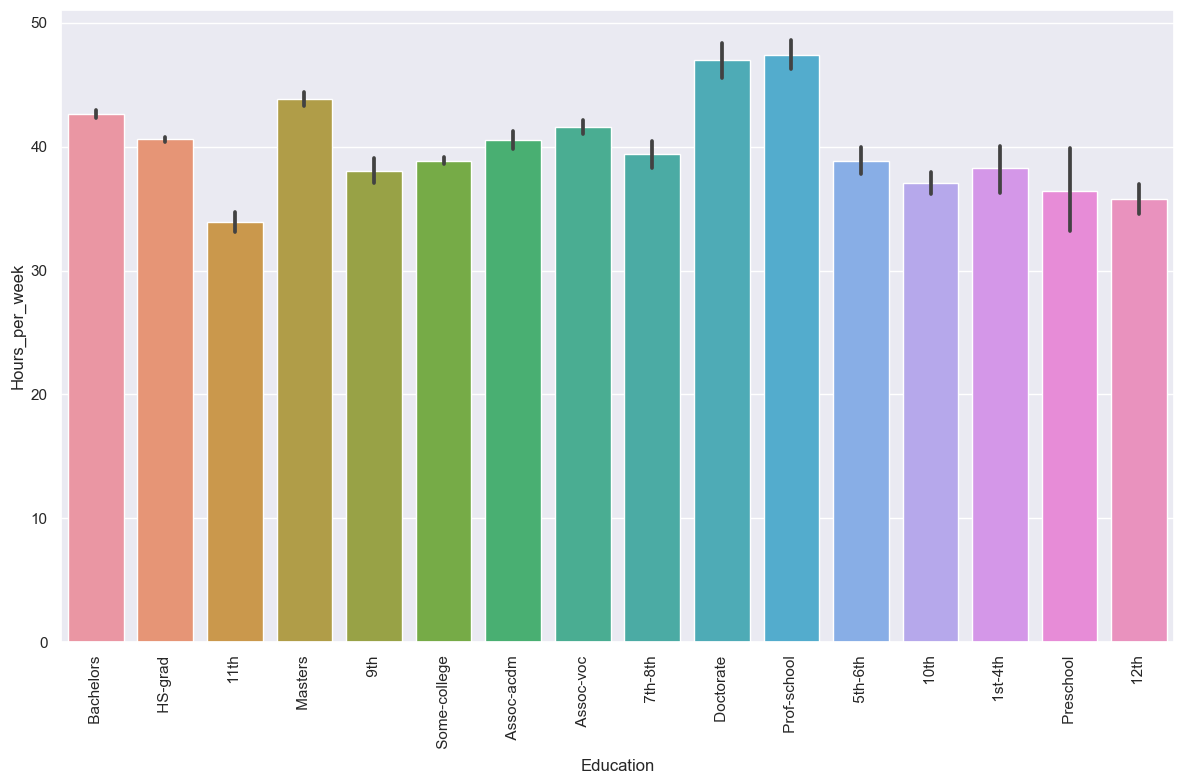

In [52]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = census_dataset['Education'], y = census_dataset['Hours_per_week'], data = census_dataset)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()


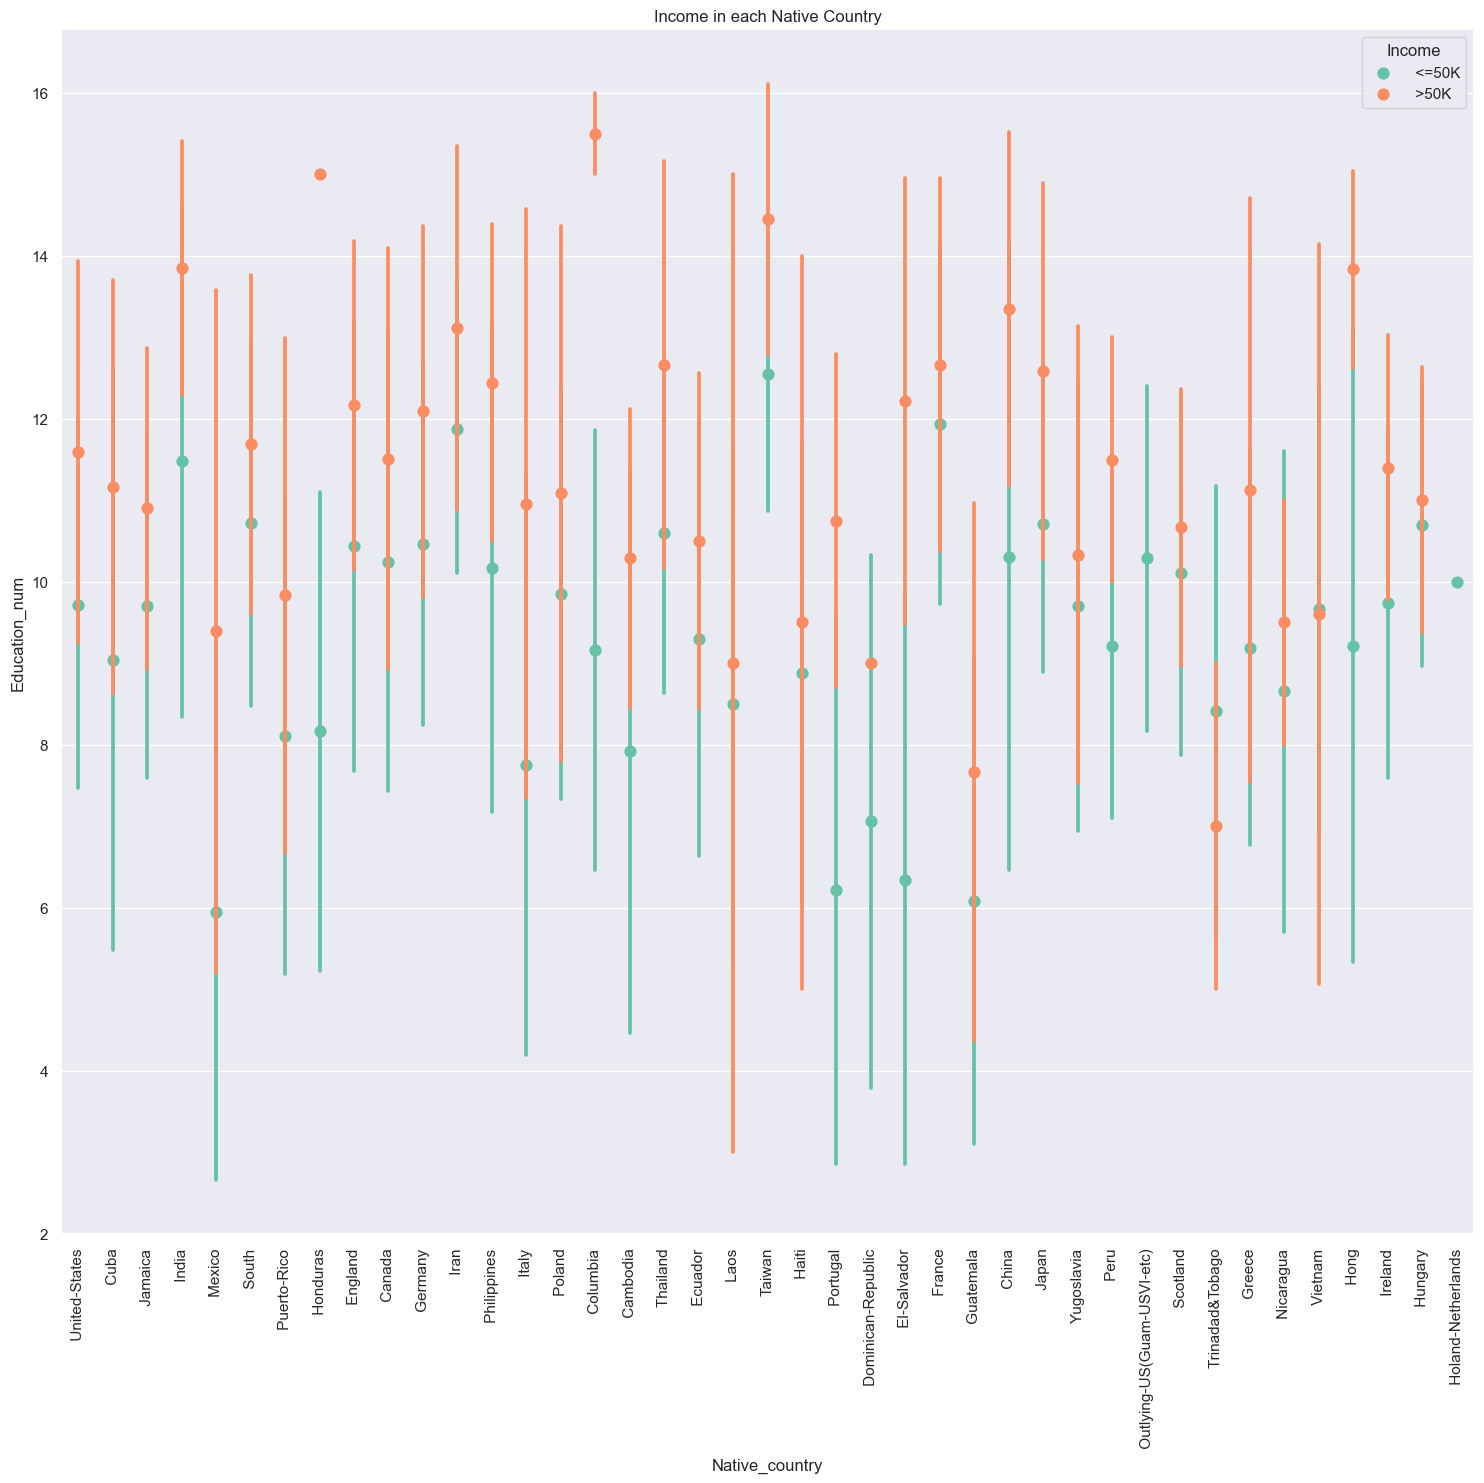

In [53]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=census_dataset, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()


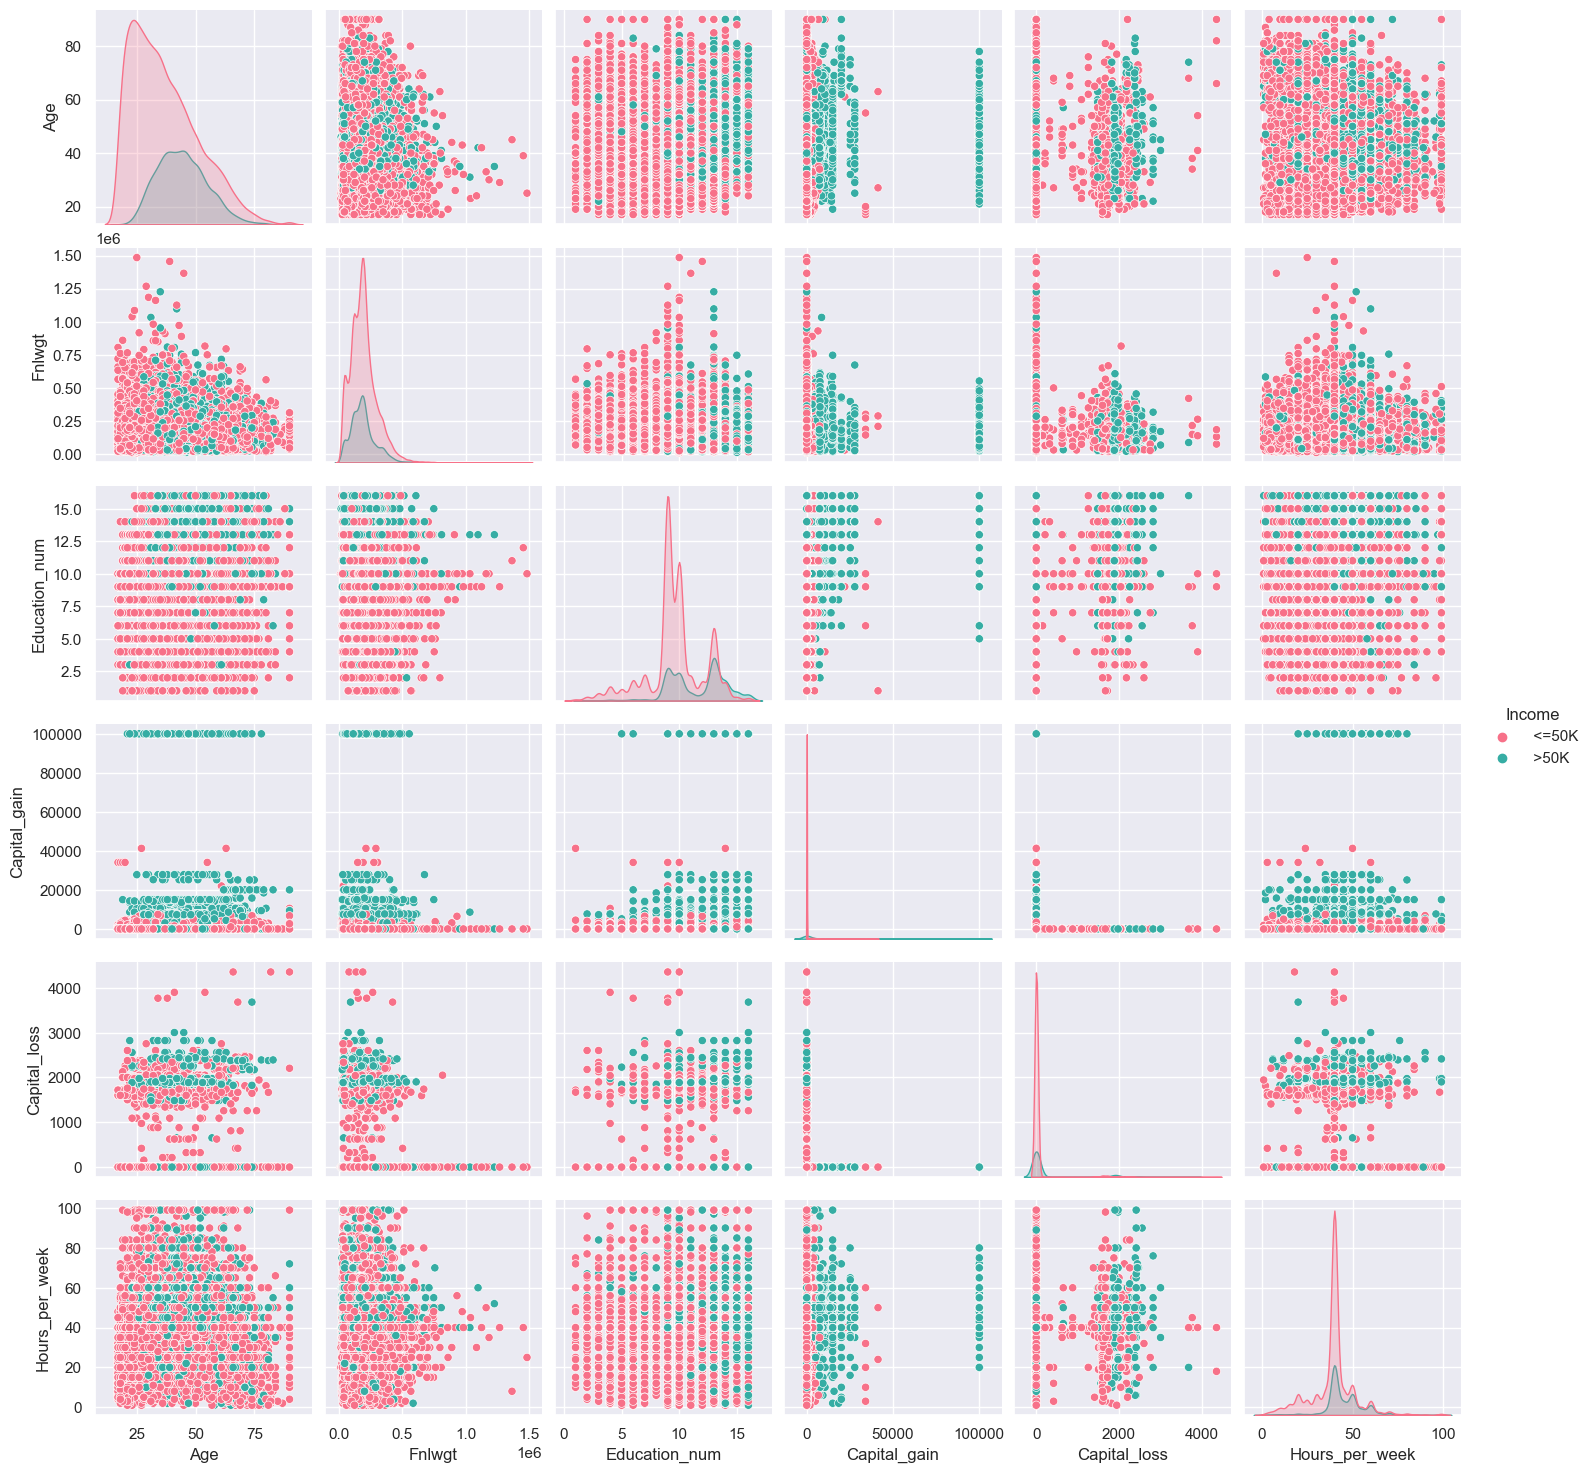

In [54]:
# Checking the pairwise relation in the dataset.
sns.pairplot(census_dataset,hue="Income",palette="husl")


In [55]:
#Encoding categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    census_dataset[i] = le.fit_transform(census_dataset[i])
census_dataset.head()


Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          5   83311          9             13               2   
1   38          3  215646         11              9               0   
2   53          3  234721          1              7               2   
3   28          3  338409          9             13               2   
4   37          3  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   Hours_per_week  Native_country  Income age_group  
0              13              38       0     41-50  
1              40              38       0     31-40  
2              40              38       0     51-60  
3              40               4       0     19-30  
4              40              38       0     31-40

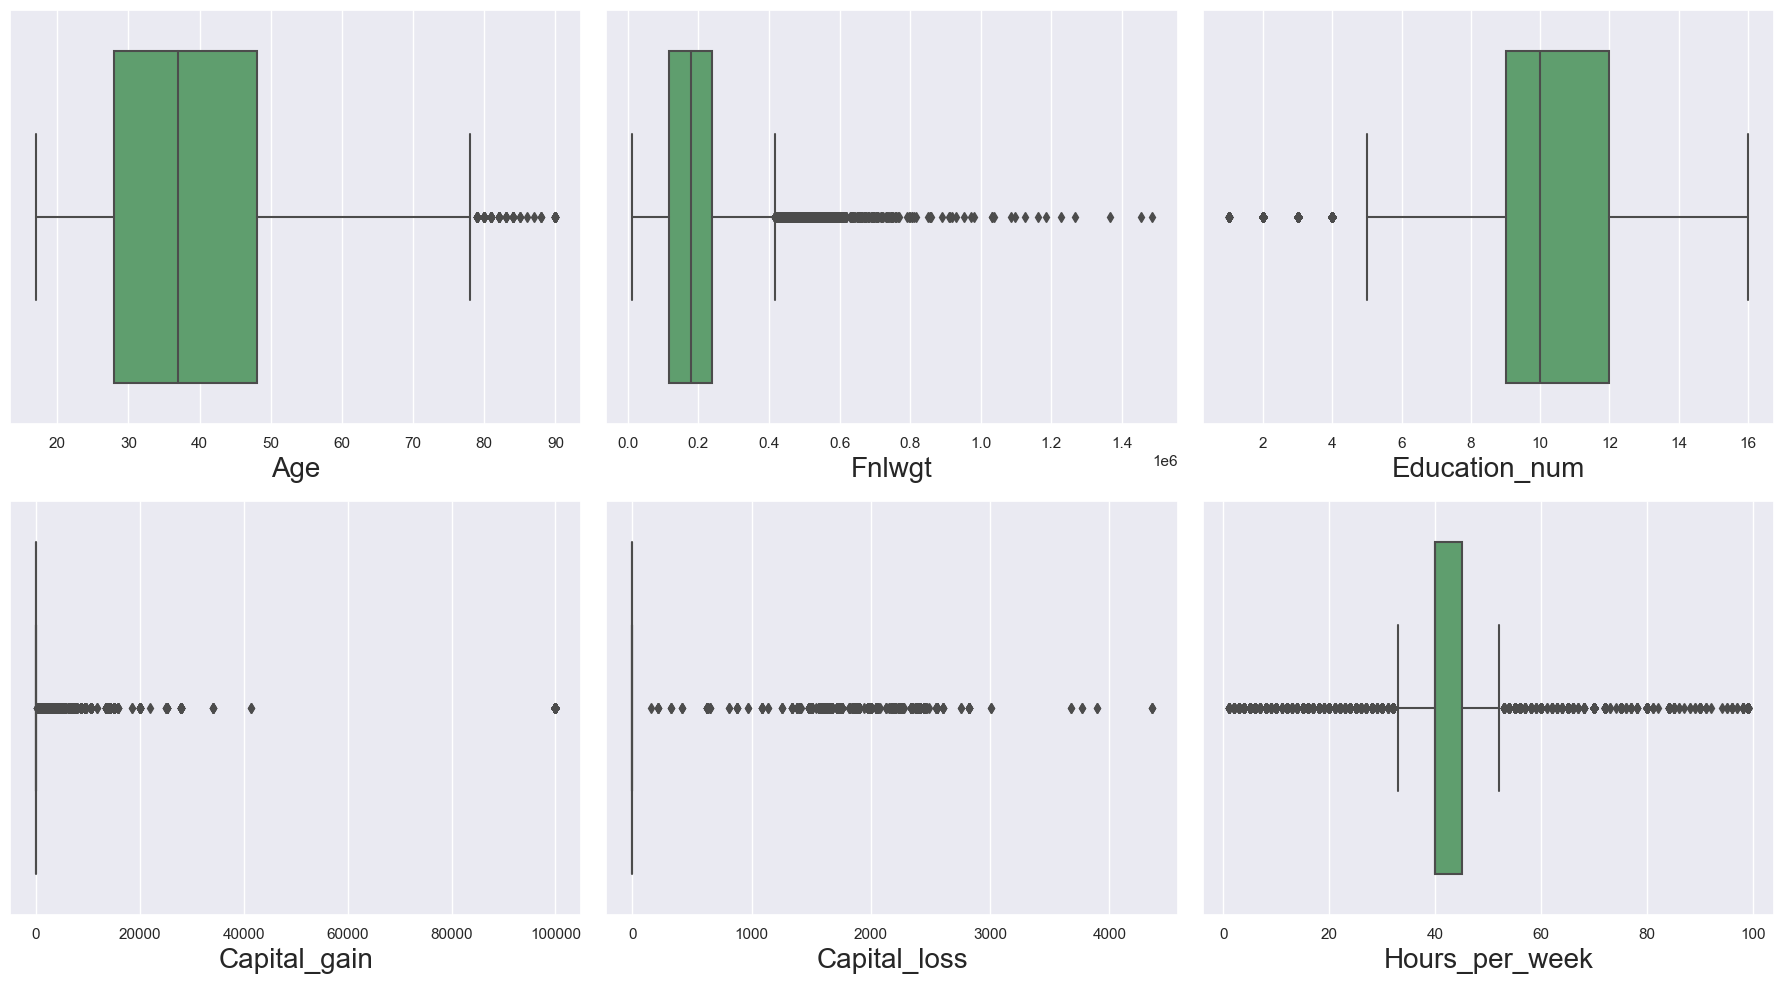

In [56]:
#Outliers Detection and Removal
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(census_dataset[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [57]:
# Droping unnecessary columns
census_dataset.drop(["Fnlwgt", "Education"], axis=1, inplace=True)


In [58]:
#Outliers removal using Zscore method
from scipy.stats import zscore
z = np.abs(zscore(census_dataset))
threshold = 3
census_dataset1 = census_dataset[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", census_dataset.shape)
print ("Shape of the dataframe after removing outliers: ", census_dataset1.shape)
print ("Percentage of data loss post outlier removal: ", (census_dataset.shape[0]-census_dataset1.shape[0])/census_dataset.shape[0]*100)

census_dataset=census_dataset1.copy()


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [59]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((32536-28061)/32536)*100,'%')

Percentage Data Loss : 13.753995574133269 %


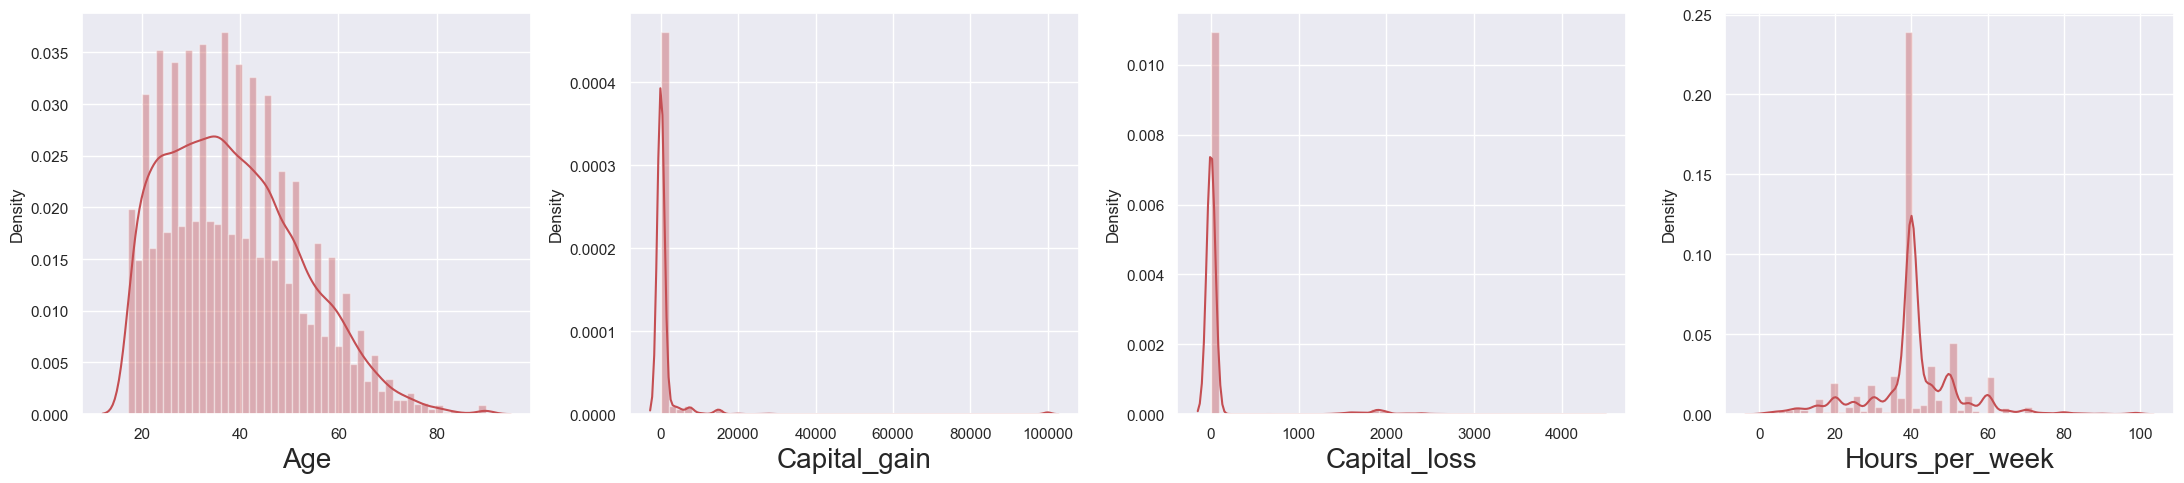

In [60]:
#Skewness of features
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in census_dataset[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(census_dataset[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [62]:
census_dataset.skew()

Age                0.557657
Workclass          0.075983
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.000407
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -4.247065
Income             1.211640
dtype: float64

In [63]:
#Correlation
census_dataset.corr()

Age  Workclass  Education_num  Marital_status  \
Age             1.000000   0.040463       0.036224       -0.266142   
Workclass       0.040463   1.000000       0.003412       -0.020506   
Education_num   0.036224   0.003412       1.000000       -0.069196   
Marital_status -0.266142  -0.020506      -0.069196        1.000000   
Occupation      0.001756   0.007285       0.070965        0.034901   
Relationship   -0.263744  -0.057904      -0.094424        0.185542   
Race            0.029116   0.048322       0.031998       -0.067942   
Sex             0.088708   0.071522       0.012181       -0.129425   
Capital_gain    0.077676   0.031497       0.122661       -0.043373   
Capital_loss    0.057745   0.002661       0.079901       -0.034134   
Hours_per_week  0.068515   0.042208       0.148426       -0.190433   
Native_country -0.000659  -0.001691       0.088044       -0.020892   
Income          0.234039   0.002747       0.335299       -0.199187   

                Occupation  Relationship      Race       Sex  Capital_gain  \
Age               0.001756     -0.263744  0.029116  0.088708      0.077676   
Workclass         0.007285     -0.057904  0.048322  0.071522      0.031497   
Education_num     0.070965     -0.094424  0.031998  0.012181      0.122661   
Marital_status    0.034901      0.185542 -0.067942 -0.129425     -0.043373   
Occupation        1.000000     -0.037443 -0.004789  0.047683      0.018013   
Relationship     -0.037443      1.000000 -0.116048 -0.582593     -0.057945   
Race             -0.004789     -0.116048  1.000000  0.087464      0.011152   
Sex               0.047683     -0.582593  0.087464  1.000000      0.048486   
Capital_gain      0.018013     -0.057945  0.011152  0.048486      1.000000   
Capital_loss      0.009644     -0.061100  0.018916  0.045576     -0.031638   
Hours_per_week   -0.012851     -0.248876  0.041921  0.229190      0.078408   
Native_country   -0.002124     -0.010838  0.116848  0.001745      0.008776   
Income            0.034490     -0.250955  0.071855  0.215984      0.223340   

                Capital_loss  Hours_per_week  Native_country    Income  
Age                 0.057745        0.068515       -0.000659  0.234039  
Workclass           0.002661        0.042208       -0.001691  0.002747  
Education_num       0.079901        0.148426        0.088044  0.335299  
Marital_status     -0.034134       -0.190433       -0.020892 -0.199187  
Occupation          0.009644       -0.012851       -0.002124  0.034490  
Relationship       -0.061100       -0.248876       -0.010838 -0.250955  
Race                0.018916        0.041921        0.116848  0.071855  
Sex                 0.045576        0.229190        0.001745  0.215984  
Capital_gain       -0.031638        0.078408        0.008776  0.223340  
Capital_loss        1.000000        0.054229        0.009337  0.150498  
Hours_per_week      0.054229        1.000000        0.006802  0.229659  
Native_country      0.009337        0.006802        1.000000  0.022858  
Income              0.150498        0.229659        0.022858  1.000000

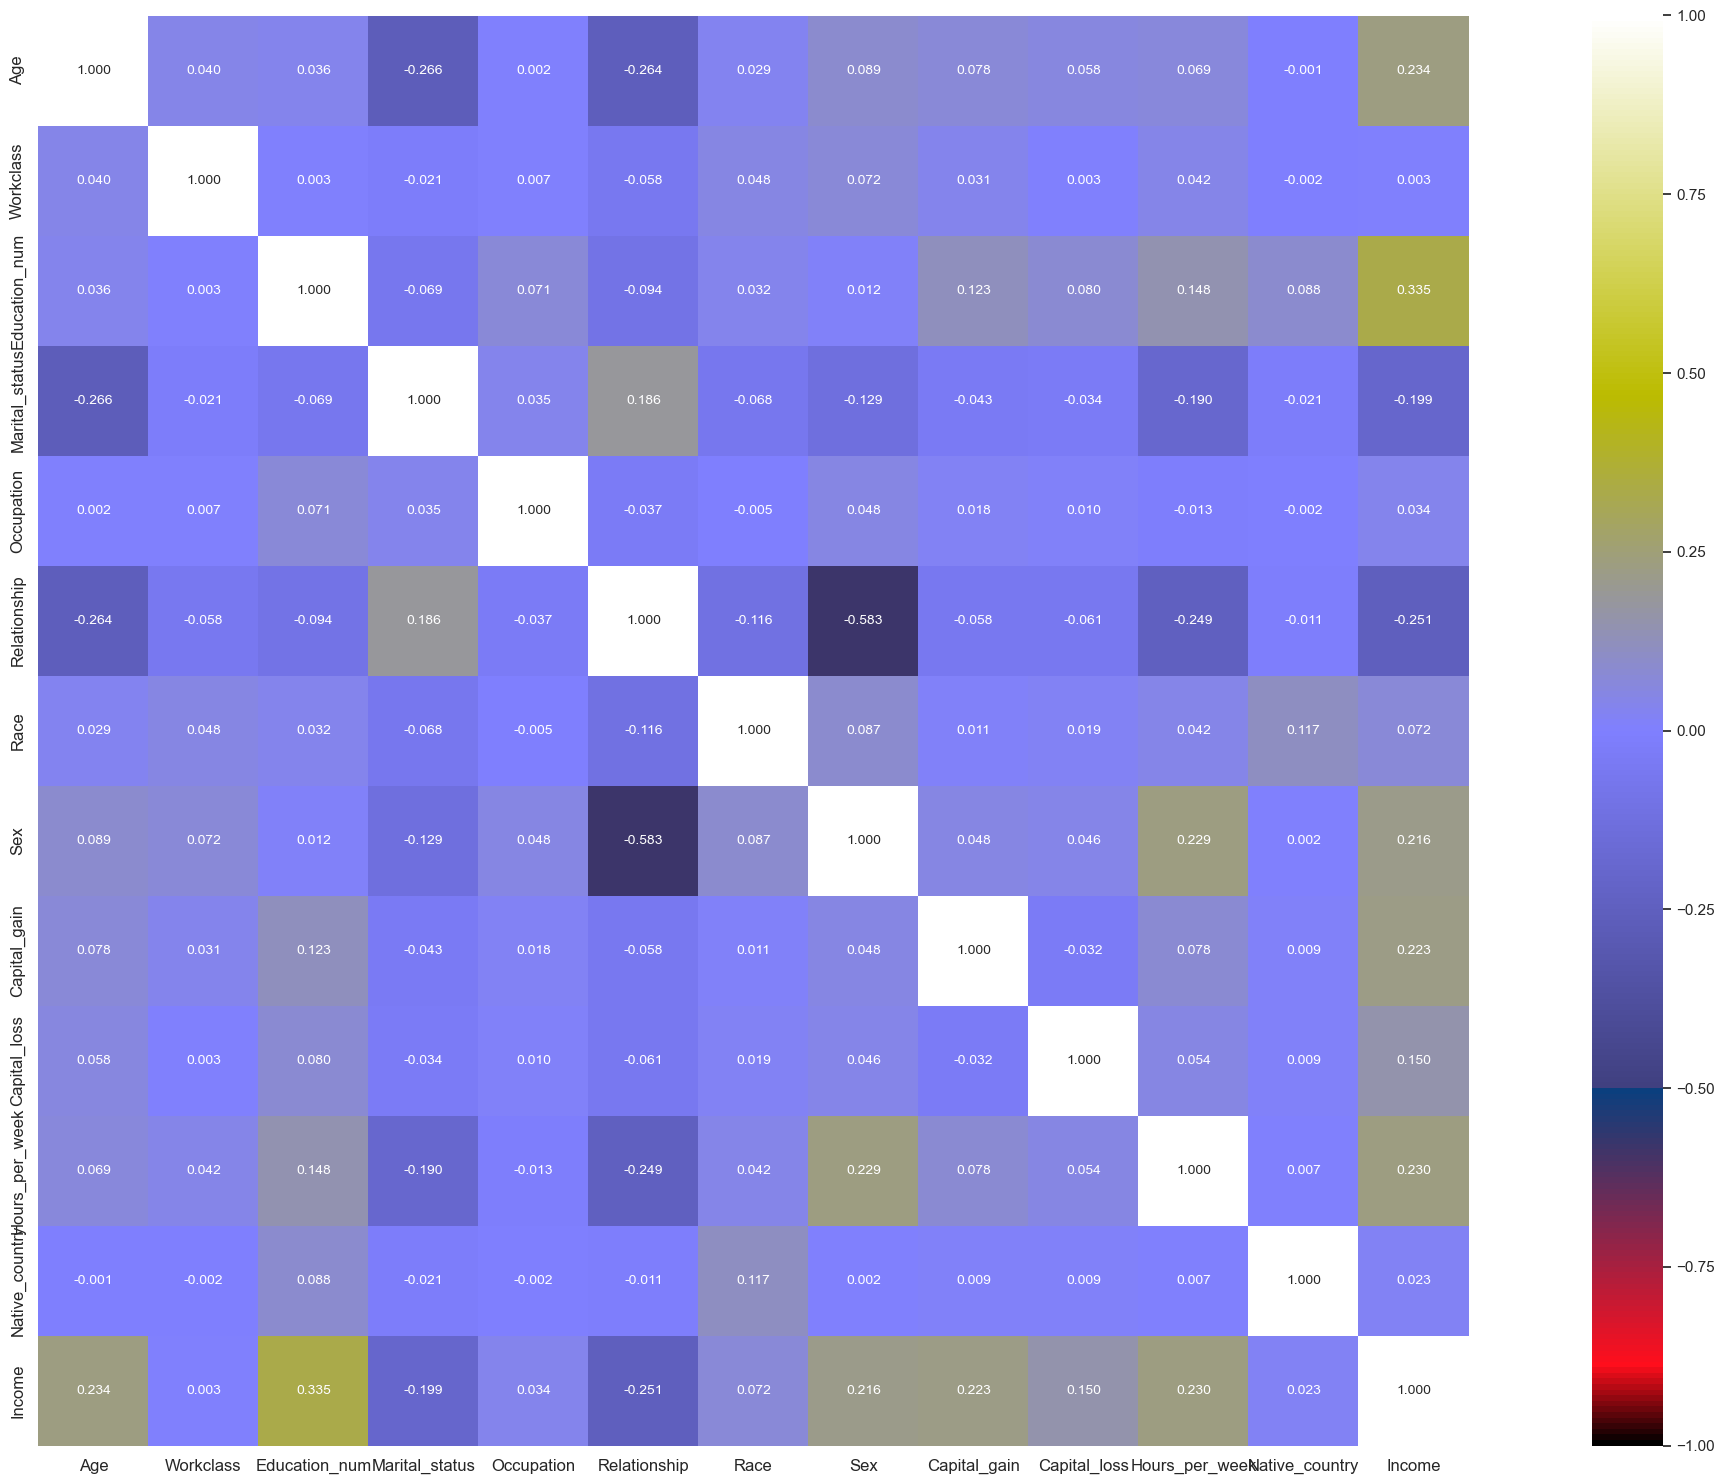

In [64]:
plt.figure(figsize=(25,15))
sns.heatmap(census_dataset.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


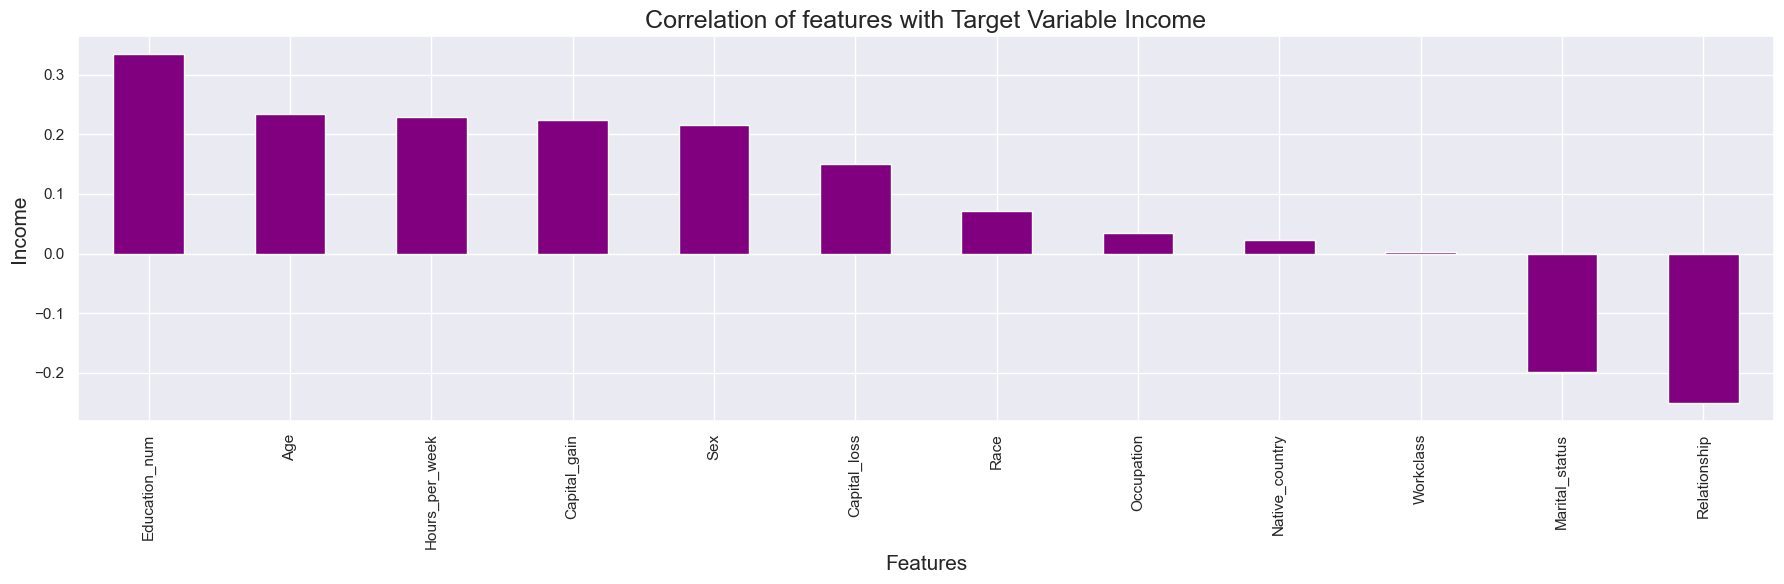

In [65]:
plt.figure(figsize = (18,6))
census_dataset.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()


In [74]:
#Balanceing Imbalanced target feature
census_dataset.Income.value_counts()


0    24697
1     7839
Name: Income, dtype: int64

In [75]:
# Splitting data in target and dependent feature
X = census_dataset.drop(['Income'], axis =1)
Y = census_dataset['Income']

In [78]:
Y.value_counts()

0    24697
1     7839
Name: Income, dtype: int64

In [79]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)


ValueError: could not convert string to float: '41-50'

In [80]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()


NameError: name 'X_scale' is not defined

In [81]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

NameError: name 'X_scale' is not defined

In [82]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

NameError: name 'x_new' is not defined

In [83]:
#Machine Learning Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

NameError: name 'principle_x' is not defined

In [86]:
#Finding best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

NameError: name 'principle_x' is not defined

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=28, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

NameError: name 'principle_x' is not defined